In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [7]:
#DF that was created with all product info
product_df = pd.read_csv("FINALP_df.csv")
product_df.head(3)

,Name,Brand,Price,No_reviews,Hearts,Size,PC,Ingredients_y,AHA,HA,...,LVMH,Loreal,Mark_Veder,PE,PG,Puig,SCJ,Shiseido,SpaceNK,Unilever
0,Protini™ Polypeptide Moisturizer,Drunk Elephant,68.0,4000,266164,1.69,Shiseido,HA,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,The Water Cream,Tatcha,68.0,3000,240692,1.70,Unilever,NaN,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Crème de la Mer Moisturizer,La Mer,180.0,667,75353,1.70,Estee_Lauder,NaN,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### A little more EDA...

In [8]:
product_df.tail(15)

,Name,Brand,Price,No_reviews,Hearts,Size,PC,Ingredients_y,AHA,HA,...,LVMH,Loreal,Mark_Veder,PE,PG,Puig,SCJ,Shiseido,SpaceNK,Unilever
290,Hydrating Moisturizer for Dry Skin,KORA Organics,48.0,24,3043,1.69,Independent,HA,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
291,Smart Night Custom-Repair Moisturizer -Combina...,CLINIQUE,58.0,15,1787,1.70,Estee_Lauder,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,Hidden Glow Brightening Cream,Wander Beauty,40.0,3,540,1.69,Independent,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,Nilotica Goddess Glow,LXMI,42.0,11,2042,1.70,Independent,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294,Belle de Jour Fantastic Fluid,KENZOKI,107.0,1,691,1.70,LVMH,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,Nurture Me™ Moisturizing Crème,OLEHENRIKSEN,40.0,1000,20583,1.70,LVMH,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,White Lucent Day Emulsion Broad Spectrum SPF 23,Shiseido,70.0,9,1672,1.70,Shiseido,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,No Worries Hydrating Face Moisturizer,Dr Roebuck's,45.0,243,5749,1.69,Unilever,HA,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,Extra–Firming Day Cream All Skin Types,Clarins,86.0,25,2056,1.70,Clarins,HA,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,SPLASH Absolute Hydration Replenishing Gel Moi...,Algenist,58.0,92,3243,2.00,PE,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Shape
product_df.shape

(305, 28)

In [10]:
# Drop rows with NaN
product_df = product_df.drop(product_df.index[291:305])

In [11]:
product_df.tail(3)

,Name,Brand,Price,No_reviews,Hearts,Size,PC,Ingredients_y,AHA,HA,...,LVMH,Loreal,Mark_Veder,PE,PG,Puig,SCJ,Shiseido,SpaceNK,Unilever
288,Full Spectrum 360° Mineral Sun Silk Moisturiz...,COOLA,42.0,6,771,1.50,SCJ,NaN,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
289,Visionnaire Advanced Multi-Correcting Cream,Lancôme,90.0,35,4281,1.70,Loreal,HA,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
290,Hydrating Moisturizer for Dry Skin,KORA Organics,48.0,24,3043,1.69,Independent,HA,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#Create new column with price/oz of product to make a more comporable target across the dataframe
product_df['Price_per_OZ'] = product_df['Price']/product_df['Size']
product_df.head(3)

,Name,Brand,Price,No_reviews,Hearts,Size,PC,Ingredients_y,AHA,HA,...,Loreal,Mark_Veder,PE,PG,Puig,SCJ,Shiseido,SpaceNK,Unilever,Price_per_OZ
0,Protini™ Polypeptide Moisturizer,Drunk Elephant,68.0,4000,266164,1.69,Shiseido,HA,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40.236685
1,The Water Cream,Tatcha,68.0,3000,240692,1.70,Unilever,NaN,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,39.999999
2,Crème de la Mer Moisturizer,La Mer,180.0,667,75353,1.70,Estee_Lauder,NaN,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.882350


#### Initial Look for Correlation

In [13]:
#See correlation across the df
product_df.corr()

,Price,No_reviews,Hearts,Size,AHA,HA,AMOREPACIFIC,Clarins,Coty,Edgewell,...,Loreal,Mark_Veder,PE,PG,Puig,SCJ,Shiseido,SpaceNK,Unilever,Price_per_OZ
Price,1.000000,-0.193673,-0.177592,0.067823,0.032486,-0.088621,-0.038938,0.160826,0.070904,-0.055274,...,-0.038349,-0.038231,0.129533,-0.031114,-0.035639,0.001179,0.017697,-0.051897,-0.060638,0.951940
No_reviews,-0.193673,1.000000,0.715189,-0.030905,0.069687,-0.112029,-0.060738,-0.025668,-0.031715,0.047531,...,-0.042788,0.032772,-0.052977,0.140084,0.021876,-0.027632,0.025381,-0.033918,-0.038824,-0.192724
Hearts,-0.177592,0.715189,1.000000,-0.024139,-0.024023,-0.061063,-0.068545,-0.065501,-0.025150,0.085257,...,-0.055999,0.048265,-0.040611,0.116115,-0.015331,-0.028860,0.124198,-0.030163,0.010147,-0.174843
Size,0.067823,-0.030905,-0.024139,1.000000,0.028999,0.031632,0.014611,-0.056094,-0.055359,-0.001588,...,-0.106874,-0.001588,0.099306,0.029291,-0.003193,-0.001588,0.051652,0.086220,-0.058738,-0.160259
AHA,0.032486,0.069687,-0.024023,0.028999,1.000000,-0.280683,0.084388,-0.048273,0.032459,-0.019537,...,-0.051748,-0.019537,0.078442,-0.062762,-0.039277,-0.019537,-0.080249,-0.027677,0.025737,0.030940
HA,-0.088621,-0.112029,-0.061063,0.031632,-0.280683,1.000000,0.028721,-0.073346,-0.024280,-0.049542,...,0.048852,0.069604,-0.056647,-0.006050,0.080050,-0.049542,0.071792,-0.070183,-0.015868,-0.091644
AMOREPACIFIC,-0.038938,-0.060738,-0.068545,0.014611,0.084388,0.028721,1.000000,-0.024395,-0.024395,-0.009873,...,-0.048082,-0.009873,-0.048082,-0.031717,-0.019849,-0.009873,-0.040555,-0.013987,-0.060131,-0.048245
Clarins,0.160826,-0.025668,-0.065501,-0.056094,-0.048273,-0.073346,-0.024395,1.000000,-0.021053,-0.008520,...,-0.041494,-0.008520,-0.041494,-0.027372,-0.017129,-0.008520,-0.034998,-0.012070,-0.051892,0.186994
Coty,0.070904,-0.031715,-0.025150,-0.055359,0.032459,-0.024280,-0.024395,-0.021053,1.000000,-0.008520,...,-0.041494,-0.008520,-0.041494,-0.027372,-0.017129,-0.008520,-0.034998,-0.012070,-0.051892,0.086639
Edgewell,-0.055274,0.047531,0.085257,-0.001588,-0.019537,-0.049542,-0.009873,-0.008520,-0.008520,1.000000,...,-0.016793,-0.003448,-0.016793,-0.011078,-0.006933,-0.003448,-0.014164,-0.004885,-0.021001,-0.056310


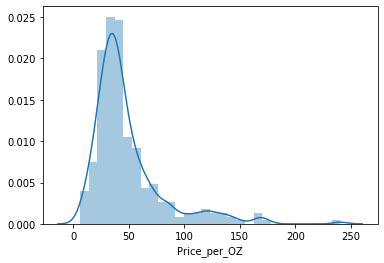

In [28]:
sns.distplot(product_df['Price_per_OZ']);

### Dataframe With Reviews, Size, Ingredients

In [30]:
#View new data that only looks at numerical features
basics_df = product_df[['Price', 'No_reviews', 'Hearts', 'Size', 'AHA', 'HA']]
basics_df.head(2)

,Price,No_reviews,Hearts,Size,AHA,HA
0,68.0,4000,266164,1.69,0,1
1,68.0,3000,240692,1.70,0,0


In [31]:
#Correlation of basic features
basics_df.corr()

,Price,No_reviews,Hearts,Size,AHA,HA
Price,1.000000,-0.193673,-0.177592,0.067823,0.032486,-0.088621
No_reviews,-0.193673,1.000000,0.715189,-0.030905,0.069687,-0.112029
Hearts,-0.177592,0.715189,1.000000,-0.024139,-0.024023,-0.061063
Size,0.067823,-0.030905,-0.024139,1.000000,0.028999,0.031632
AHA,0.032486,0.069687,-0.024023,0.028999,1.000000,-0.280683
HA,-0.088621,-0.112029,-0.061063,0.031632,-0.280683,1.000000


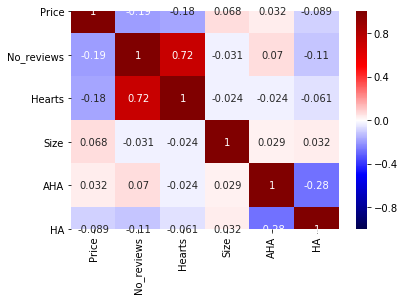

In [32]:
#Heat map of correlation
sns.heatmap(basics_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

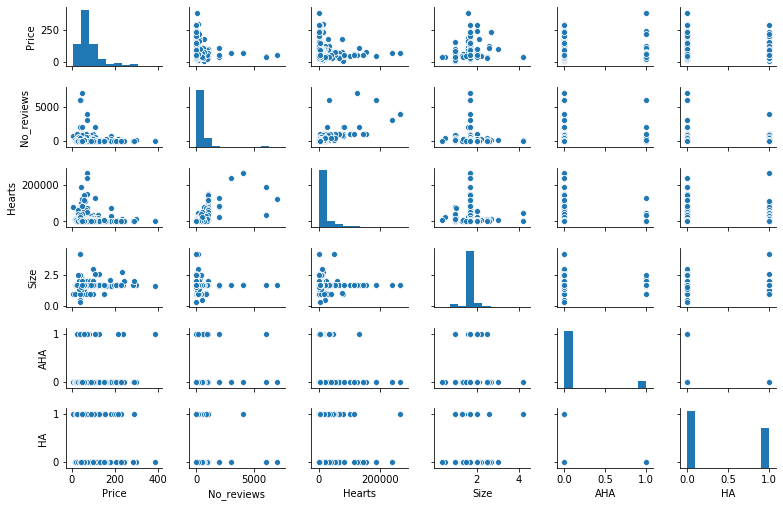

In [33]:
#Pairplots of all the variables as scatterplots
sns.pairplot(basics_df, height=1.2, aspect=1.5);

In [39]:
#Basic regression model for basic_df
y, X = patsy.dmatrices('Price ~ No_reviews + Hearts + Size + AHA + HA', data=basics_df, return_type="dataframe")

# Create the model
model = sm.OLS(y, X)

# Fit model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     3.439
Date:                Fri, 17 Jul 2020   Prob (F-statistic):            0.00493
Time:                        09:09:31   Log-Likelihood:                -1571.2
No. Observations:                 291   AIC:                             3154.
Df Residuals:                     285   BIC:                             3176.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.5769     17.128      4.296      0.000      39.864     107.289
No_reviews    -0.0108      0.006     -1.823      0.069      -0.023       0.001
Hearts        -0.0001      0.000     -0.896      0.371      -0.000       0.000
Size          10.8169      9.653      1.121      0.263      -8.183      29.817
AHA            1.5801     11.107      0.142      0.887     -20.282      23.442
HA           -12.2773      6.741     -1.821      0.070     -25.545       0.990
==============================================================================
Omnibus:                      144.443   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              610.982
Skew:                           2.149   Prob(JB):                    2.12e-133
Kurtosis:                       8.649   Cond. No.                     2.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Remove AHA and Hearts which have the highest P-value
y, X = patsy.dmatrices('Price ~ No_reviews + Size + HA', data=basics_df, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit2 = model.fit()

# Print summary statistics of the model's performance
fit2.summary()

In [ ]:
y, X = patsy.dmatrices('Price ~ No_reviews + Size', data=basics_df, return_type="dataframe")

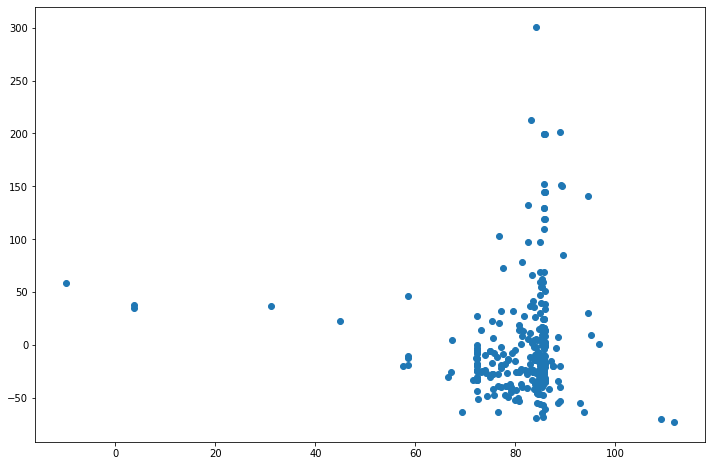

In [273]:
plt.figure(figsize=(12,8))
plt.scatter(fit2.predict(), fit2.resid);

In [274]:
# Create an empty model
lr = LinearRegression()

# Choose the predictor variables, here all but the first which is the response variable
# This model is analogous to the Y ~ X1 + X2 + X3 + X4 + X5 + X6 model
X = basics_df.iloc[:, 1:3]
y = basics_df.iloc[:, 0]

# Fit the model to the full dataset
lr.fit(X, y)

# Print out the R^2 for the model against the full dataset
lr.score(X,y)


0.04063556720749373

### Basics DF with Price/OZ instead of Price

In [275]:
#View new data that only looks at numerical features
basics_oz_df = product_df[['Price_per_OZ', 'No_reviews', 'Hearts', 'Size']]
basics_oz_df.head(2)

,Price_per_OZ,No_reviews,Hearts,Size
0,40.236685,4000,266164,1.69
1,39.999999,3000,240692,1.70


In [276]:
#Correlation of basic features
basics_oz_df.corr()

,Price_per_OZ,No_reviews,Hearts,Size
Price_per_OZ,1.000000,-0.192724,-0.174843,-0.160259
No_reviews,-0.192724,1.000000,0.715189,-0.030905
Hearts,-0.174843,0.715189,1.000000,-0.024139
Size,-0.160259,-0.030905,-0.024139,1.000000


#### Compre to correlation featuring Price

In [277]:
basics_df.corr()

,Price,No_reviews,Hearts,Size
Price,1.000000,-0.193673,-0.177592,0.067823
No_reviews,-0.193673,1.000000,0.715189,-0.030905
Hearts,-0.177592,0.715189,1.000000,-0.024139
Size,0.067823,-0.030905,-0.024139,1.000000


Correlation appears largely unchanged

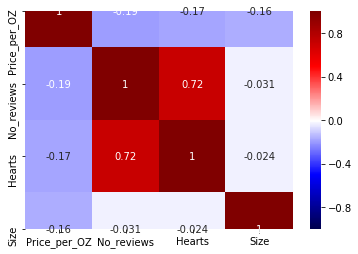

In [278]:
#Heat map of correlation
sns.heatmap(basics_oz_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

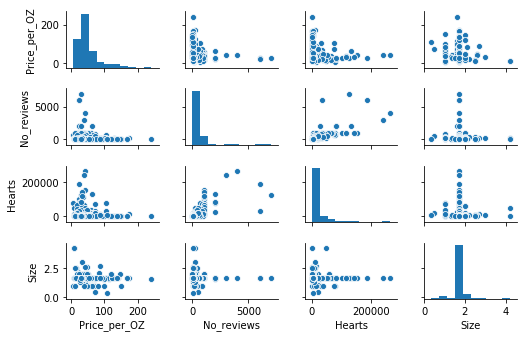

In [279]:
#Pairplots of all the variables as scatterplots
sns.pairplot(basics_oz_df, height=1.2, aspect=1.5);

In [280]:
#Basic regression model for basic_df
y, X = patsy.dmatrices('Price_per_OZ ~ No_reviews + Hearts + Size', data=basics_oz_df, return_type="dataframe")

# Create the model
model = sm.OLS(y, X)

# Fit model to your training set
fit2 = model.fit()

# Print summary statistics of the model's performance
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_per_OZ   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     6.942
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           0.000159
Time:                        23:29:11   Log-Likelihood:                -1416.9
No. Observations:                 291   AIC:                             2842.
Df Residuals:                     287   BIC:                             2856.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.1427      9.919      8.080      0.000      60.619      99.666
No_reviews    -0.0061      0.003     -1.756      0.080      -0.013       0.001
Hearts     -7.521e-05   8.02e-05     -0.938      0.349      -0.000    8.27e-05
Size         -16.5080      5.653     -2.920      0.004     -27.634      -5.382
==============================================================================
Omnibus:                      152.207   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              746.208
Skew:                           2.212   Prob(JB):                    9.18e-163
Kurtosis:                       9.479   Cond. No.                     2.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Slight slight slight improvement in R^2 value

In [281]:
#Remove hearts as it has highest P value to see if there is an improvement
#Basic regression model for basic_df
y, X = patsy.dmatrices('Price_per_OZ ~ No_reviews + Size', data=basics_oz_df, return_type="dataframe")

# Create the model
model = sm.OLS(y, X)

# Fit model to your training set
fit3 = model.fit()

# Print summary statistics of the model's performance
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_per_OZ   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     9.977
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           6.46e-05
Time:                        23:29:15   Log-Likelihood:                -1417.3
No. Observations:                 291   AIC:                             2841.
Df Residuals:                     288   BIC:                             2852.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.6652      9.904      8.044      0.000      60.172      99.159
No_reviews    -0.0084      0.002     -3.471      0.001      -0.013      -0.004
Size         -16.4926      5.652     -2.918      0.004     -27.616      -5.369
==============================================================================
Omnibus:                      152.615   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              752.509
Skew:                           2.216   Prob(JB):                    3.93e-164
Kurtosis:                       9.512   Cond. No.                     5.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R^2 is slightly worse 

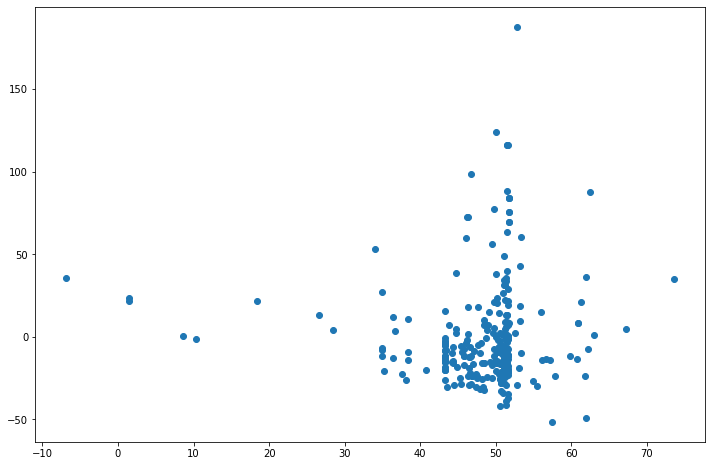

In [282]:
#Show all variables in the residual plot
plt.figure(figsize=(12,8))
plt.scatter(fit3.predict(), fit3.resid);

### Basics and Ingredients

In [283]:
IB_df = product_df[['Price_per_OZ', 'No_reviews', 'Hearts', 'Size', 'AHA', 'HA']]
IB_df.head(2)

,Price_per_OZ,No_reviews,Hearts,Size,AHA,HA
0,40.236685,4000,266164,1.69,0,1
1,39.999999,3000,240692,1.70,0,0


In [284]:
IB_df.corr()

,Price_per_OZ,No_reviews,Hearts,Size,AHA,HA
Price_per_OZ,1.000000,-0.192724,-0.174843,-0.160259,0.030940,-0.091644
No_reviews,-0.192724,1.000000,0.715189,-0.030905,0.069687,-0.112029
Hearts,-0.174843,0.715189,1.000000,-0.024139,-0.024023,-0.061063
Size,-0.160259,-0.030905,-0.024139,1.000000,0.028999,0.031632
AHA,0.030940,0.069687,-0.024023,0.028999,1.000000,-0.280683
HA,-0.091644,-0.112029,-0.061063,0.031632,-0.280683,1.000000


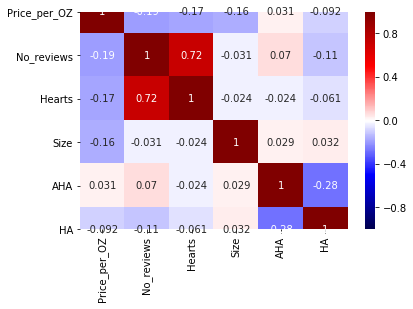

In [285]:
sns.heatmap(IB_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

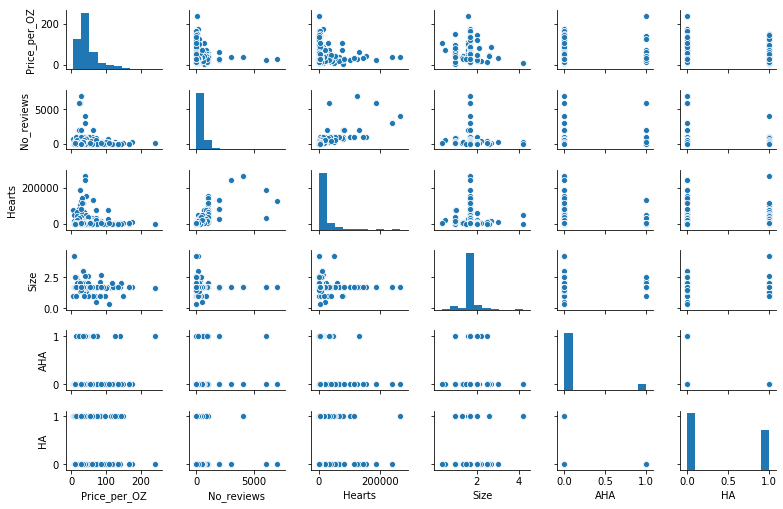

In [286]:
sns.pairplot(IB_df, height=1.2, aspect=1.5);

In [288]:
y, X = patsy.dmatrices('Price_per_OZ ~ No_reviews + Hearts + Size + AHA + HA', data=IB_df, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit4 = model.fit()

# Print summary statistics of the model's performance
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_per_OZ   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     4.924
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           0.000244
Time:                        23:29:47   Log-Likelihood:                -1415.0
No. Observations:                 291   AIC:                             2842.
Df Residuals:                     285   BIC:                             2864.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     82.5861     10.013      8.248      0.000      62.877     102.295
No_reviews    -0.0068      0.003     -1.954      0.052      -0.014    4.83e-05
Hearts     -6.883e-05   8.04e-05     -0.856      0.393      -0.000    8.95e-05
Size         -16.2647      5.643     -2.882      0.004     -27.372      -5.157
AHA            1.7370      6.494      0.267      0.789     -11.044      14.518
HA            -6.8998      3.941     -1.751      0.081     -14.656       0.857
==============================================================================
Omnibus:                      146.799   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              672.341
Skew:                           2.149   Prob(JB):                    1.01e-146
Kurtosis:                       9.082   Cond. No.                     2.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Modest tick up in R^2

In [289]:
y, X = patsy.dmatrices('Price_per_OZ ~ No_reviews + Hearts + Size +  HA', data=IB_df, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit5 = model.fit()

# Print summary statistics of the model's performance
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_per_OZ   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     6.157
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           9.15e-05
Time:                        23:29:50   Log-Likelihood:                -1415.0
No. Observations:                 291   AIC:                             2840.
Df Residuals:                     286   BIC:                             2858.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     82.7784      9.971      8.302      0.000      63.152     102.405
No_reviews    -0.0067      0.003     -1.940      0.053      -0.013    9.62e-05
Hearts     -7.103e-05   7.99e-05     -0.889      0.375      -0.000    8.62e-05
Size         -16.2036      5.630     -2.878      0.004     -27.284      -5.123
HA            -7.1898      3.783     -1.901      0.058     -14.635       0.255
==============================================================================
Omnibus:                      147.989   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              690.396
Skew:                           2.161   Prob(JB):                    1.21e-150
Kurtosis:                       9.186   Cond. No.                     2.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

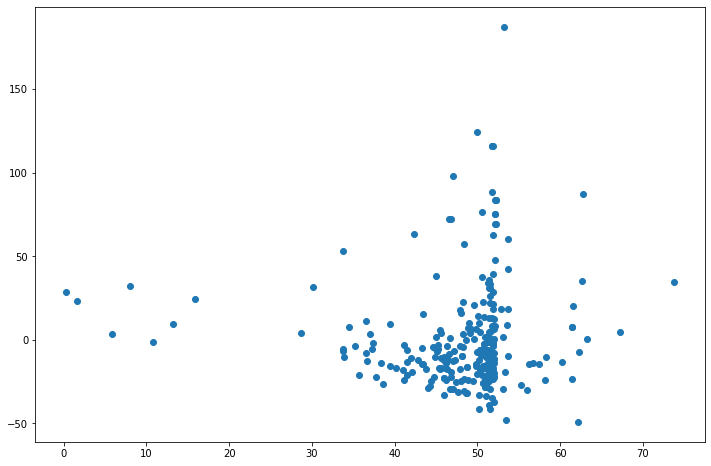

In [290]:
plt.figure(figsize=(12,8))
plt.scatter(fit2.predict(), fit2.resid);

### Brands

In [218]:
product_df.columns

Index(['Name', 'Brand', 'Price', 'No_reviews', 'Hearts', 'Size', 'PC',
       'Ingredients_y', 'AHA', 'HA', 'AMOREPACIFIC', 'Clarins', 'Coty',
       'Edgewell', 'Estee_Lauder', 'Independent', 'Kose', 'LG', 'LVMH',
       'Loreal', 'Mark_Veder', 'PE', 'PG', 'Puig', 'SCJ', 'Shiseido',
       'SpaceNK', 'Unilever', 'Price_per_OZ'],
      dtype='object')

In [30]:
EL_brands_df = product_df.loc[:, ['Price','Bobbi Brown', 'CLINIQUE',
       'Estée Lauder', 'La Mer', 'Origins', 'Smashbox', 'The Ordinary']]

In [31]:
EL_brands_df.describe()

,Price,Bobbi Brown,CLINIQUE,Estée Lauder,La Mer,Origins,Smashbox,The Ordinary
count,305.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,79.796000,0.010309,0.061856,0.024055,0.017182,0.017182,0.003436,0.003436
std,52.931003,0.101184,0.241308,0.153484,0.130173,0.130173,0.058621,0.058621
min,5.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,385.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
#Correlation between variables in the dataframe
EL_brands_df.corr()

,Price,Bobbi Brown,CLINIQUE,Estée Lauder,La Mer,Origins,Smashbox,The Ordinary
Price,1.000000,-0.013568,0.005728,0.041312,0.103680,-0.010279,-0.048325,-0.081698
Bobbi Brown,-0.013568,1.000000,-0.026207,-0.016023,-0.013495,-0.013495,-0.005993,-0.005993
CLINIQUE,0.005728,-0.026207,1.000000,-0.040313,-0.033951,-0.033951,-0.015078,-0.015078
Estée Lauder,0.041312,-0.016023,-0.040313,1.000000,-0.020758,-0.020758,-0.009219,-0.009219
La Mer,0.103680,-0.013495,-0.033951,-0.020758,1.000000,-0.017483,-0.007764,-0.007764
Origins,-0.010279,-0.013495,-0.033951,-0.020758,-0.017483,1.000000,-0.007764,-0.007764
Smashbox,-0.048325,-0.005993,-0.015078,-0.009219,-0.007764,-0.007764,1.000000,-0.003448
The Ordinary,-0.081698,-0.005993,-0.015078,-0.009219,-0.007764,-0.007764,-0.003448,1.000000


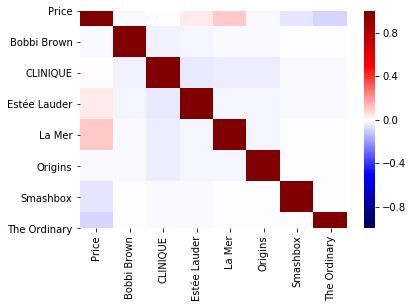

In [34]:
#Heat map to visualize above correlation table
sns.heatmap(EL_brands_df.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);

/Users/krystynametcalf/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/krystynametcalf/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


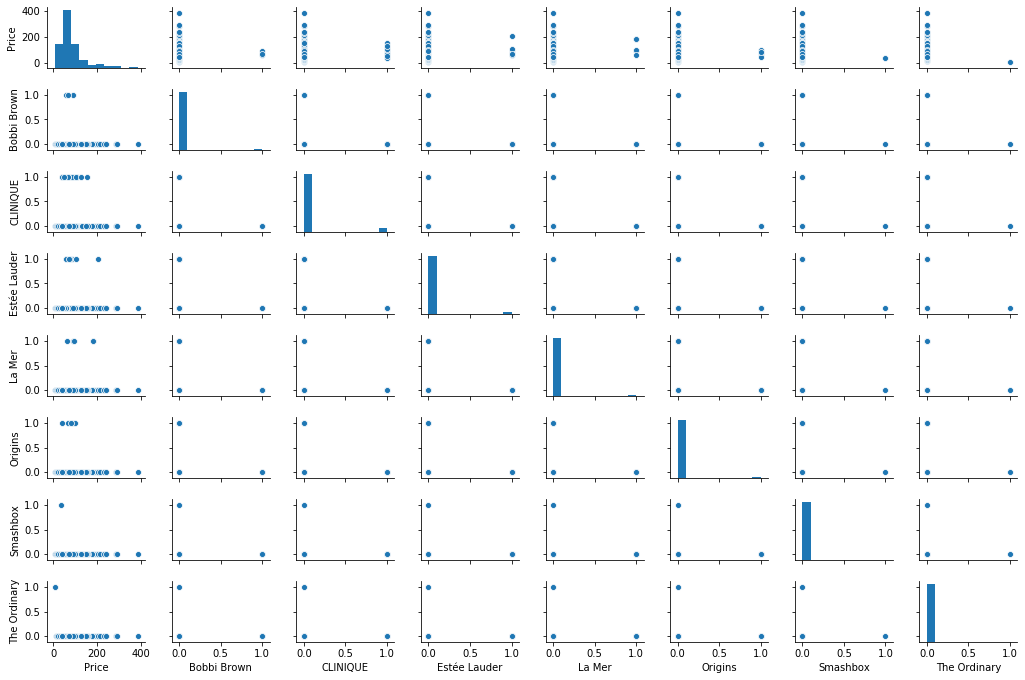

In [35]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(EL_brands_df, height=1.2, aspect=1.5);

### Parent Company

In [14]:
PC_df = product_df[['Price_per_OZ', 'No_reviews', 'Hearts', 'Size','AMOREPACIFIC', 'Clarins',
                    'Coty','Edgewell', 'Estee_Lauder', 'Independent', 'Kose', 'LG', 'LVMH',
                    'Loreal', 'Mark_Veder', 'PE', 'PG', 'Shiseido', 'SpaceNK', 'Unilever']]
PC_df.head(2)

,Price_per_OZ,No_reviews,Hearts,Size,AMOREPACIFIC,Clarins,Coty,Edgewell,Estee_Lauder,Independent,Kose,LG,LVMH,Loreal,Mark_Veder,PE,PG,Shiseido,SpaceNK,Unilever
0,40.236685,4000,266164,1.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,39.999999,3000,240692,1.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
PC_df.corr()

,Price_per_OZ,No_reviews,Hearts,Size,AMOREPACIFIC,Clarins,Coty,Edgewell,Estee_Lauder,Independent,Kose,LG,LVMH,Loreal,Mark_Veder,PE,PG,Shiseido,SpaceNK,Unilever
Price_per_OZ,1.000000,-0.192724,-0.174843,-0.160259,-0.048245,0.186994,0.086639,-0.056310,0.044895,-0.055103,-0.052401,-0.023487,-0.015875,-0.008834,-0.039369,0.116096,-0.052013,-0.008473,-0.060064,-0.037233
No_reviews,-0.192724,1.000000,0.715189,-0.030905,-0.060738,-0.025668,-0.031715,0.047531,-0.053382,0.053780,0.098082,0.016340,0.015145,-0.042788,0.032772,-0.052977,0.140084,0.025381,-0.033918,-0.038824
Hearts,-0.174843,0.715189,1.000000,-0.024139,-0.068545,-0.065501,-0.025150,0.085257,-0.009621,-0.037759,0.061847,-0.001281,0.035434,-0.055999,0.048265,-0.040611,0.116115,0.124198,-0.030163,0.010147
Size,-0.160259,-0.030905,-0.024139,1.000000,0.014611,-0.056094,-0.055359,-0.001588,0.116871,-0.012386,-0.012064,-0.001588,-0.082505,-0.106874,-0.001588,0.099306,0.029291,0.051652,0.086220,-0.058738
AMOREPACIFIC,-0.048245,-0.060738,-0.068545,0.014611,1.000000,-0.024395,-0.024395,-0.009873,-0.067119,-0.113412,-0.017160,-0.009873,-0.050408,-0.048082,-0.009873,-0.048082,-0.031717,-0.040555,-0.013987,-0.060131
Clarins,0.186994,-0.025668,-0.065501,-0.056094,-0.024395,1.000000,-0.021053,-0.008520,-0.057922,-0.097872,-0.014809,-0.008520,-0.043501,-0.041494,-0.008520,-0.041494,-0.027372,-0.034998,-0.012070,-0.051892
Coty,0.086639,-0.031715,-0.025150,-0.055359,-0.024395,-0.021053,1.000000,-0.008520,-0.057922,-0.097872,-0.014809,-0.008520,-0.043501,-0.041494,-0.008520,-0.041494,-0.027372,-0.034998,-0.012070,-0.051892
Edgewell,-0.056310,0.047531,0.085257,-0.001588,-0.009873,-0.008520,-0.008520,1.000000,-0.023442,-0.039610,-0.005993,-0.003448,-0.017606,-0.016793,-0.003448,-0.016793,-0.011078,-0.014164,-0.004885,-0.021001
Estee_Lauder,0.044895,-0.053382,-0.009621,0.116871,-0.067119,-0.057922,-0.057922,-0.023442,1.000000,-0.269277,-0.040743,-0.023442,-0.119686,-0.114164,-0.023442,-0.114164,-0.075308,-0.096291,-0.033209,-0.142771
Independent,-0.055103,0.053780,-0.037759,-0.012386,-0.113412,-0.097872,-0.097872,-0.039610,-0.269277,1.000000,-0.068845,-0.039610,-0.202235,-0.192904,-0.039610,-0.192904,-0.127248,-0.162704,-0.056114,-0.241242


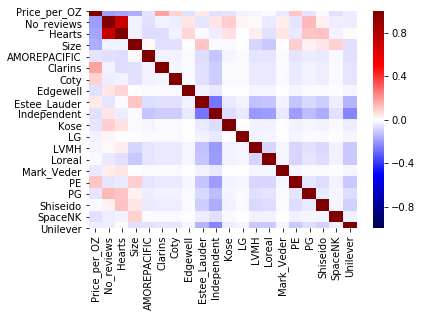

In [16]:
#Heat map of correlation
sns.heatmap(PC_df.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);

In [ ]:
#Pairplots of all the variables as scatterplots
sns.pairplot(PC_df, height=1.2, aspect=1.5);

In [19]:
#Basic regression model for PC_df
y, X = patsy.dmatrices('Price_per_OZ ~ No_reviews + Hearts + Size + AMOREPACIFIC + Clarins + Coty + Edgewell + Estee_Lauder + Independent + Kose + LG + LVMH + Loreal + Mark_Veder + PE + PG + Shiseido + SpaceNK + Unilever', data=PC_df, return_type="dataframe")

# Create the model
model = sm.OLS(y, X)

# Fit model to your training set
fit6 = model.fit()

# Print summary statistics of the model's performance
fit6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_per_OZ   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     2.247
Date:                Fri, 17 Jul 2020   Prob (F-statistic):            0.00252
Time:                        06:22:30   Log-Likelihood:                -1405.8
No. Observations:                 291   AIC:                             2852.
Df Residuals:                     271   BIC:                             2925.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       72.2595     17.185      4.205      0.000      38.426     106.093
No_reviews      -0.0055      0.003     -1.584      0.114      -0.012       0.001
Hearts       -6.655e-05   8.16e-05     -0.815      0.416      -0.000    9.42e-05
Size           -17.2663      5.770     -2.992      0.003     -28.627      -5.906
AMOREPACIFIC    -2.4784     17.934     -0.138      0.890     -37.785      32.828
Clarins         46.9273     19.047      2.464      0.014       9.429      84.425
Coty            24.8273     19.056      1.303      0.194     -12.689      62.344
Edgewell       -15.9515     34.584     -0.461      0.645     -84.039      52.136
Estee_Lauder    13.5388     14.946      0.906      0.366     -15.885      42.963
Independent      6.2768     14.438      0.435      0.664     -22.148      34.701
Kose            -3.1558     23.016     -0.137      0.891     -48.469      42.158
LG              -3.2342     34.424     -0.094      0.925     -71.007      64.539
LVMH             6.0148     15.479      0.389      0.698     -24.459      36.489
Loreal           4.6280     15.592      0.297      0.767     -26.069      35.325
Mark_Veder      -9.0020     34.482     -0.261      0.794     -76.889      58.885
PE              22.9435     15.603      1.470      0.143      -7.775      53.662
PG               5.2425     17.288      0.303      0.762     -28.793      39.278
Shiseido        10.4858     16.212      0.647      0.518     -21.432      42.404
SpaceNK        -11.3755     26.384     -0.431      0.667     -63.320      40.569
Unilever         4.0996     15.114      0.271      0.786     -25.656      33.855
==============================================================================
Omnibus:                      147.880   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              768.540
Skew:                           2.102   Prob(JB):                    1.30e-167
Kurtosis:                       9.761   Cond. No.                     1.24e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Finally R^2 above 0.1

In [295]:
#Basic regression model for PC_df ommitting (P-score > 0.8)
y, X = patsy.dmatrices('Price_per_OZ ~ No_reviews + Hearts + Size + AMOREPACIFIC + Clarins + Coty + Edgewell + Estee_Lauder + Independent + Kose + LVMH + Loreal + Mark_Veder + PE + PG + Shiseido + SpaceNK + Unilever', data=PC_df, return_type="dataframe")

# Create the model
model = sm.OLS(y, X)

# Fit model to your training set
fit7 = model.fit()

# Print summary statistics of the model's performance
fit7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_per_OZ   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     2.380
Date:                Thu, 16 Jul 2020   Prob (F-statistic):            0.00156
Time:                        23:30:21   Log-Likelihood:                -1405.8
No. Observations:                 291   AIC:                             2850.
Df Residuals:                     272   BIC:                             2919.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       71.7221     16.175      4.434      0.000      39.877     103.567
No_reviews      -0.0055      0.003     -1.587      0.114      -0.012       0.001
Hearts       -6.657e-05   8.15e-05     -0.817      0.415      -0.000    9.38e-05
Size           -17.2666      5.760     -2.998      0.003     -28.606      -5.927
AMOREPACIFIC    -1.9403     16.963     -0.114      0.909     -35.337      31.456
Clarins         47.4657     18.131      2.618      0.009      11.771      83.161
Coty            25.3657     18.141      1.398      0.163     -10.348      61.079
Edgewell       -15.4104     34.039     -0.453      0.651     -82.424      51.603
Estee_Lauder    14.0775     13.777      1.022      0.308     -13.045      41.200
Independent      6.8158     13.225      0.515      0.607     -19.220      32.851
Kose            -2.6148     22.244     -0.118      0.907     -46.407      41.177
LVMH             6.5539     14.350      0.457      0.648     -21.697      34.805
Loreal           5.1666     14.474      0.357      0.721     -23.328      33.661
Mark_Veder      -8.4617     33.937     -0.249      0.803     -75.275      58.351
PE              23.4821     14.485      1.621      0.106      -5.035      52.000
PG               5.7831     16.272      0.355      0.723     -26.252      37.818
Shiseido        11.0251     15.134      0.728      0.467     -18.770      40.820
SpaceNK        -10.8374     25.708     -0.422      0.674     -61.450      39.775
Unilever         4.6383     13.958      0.332      0.740     -22.842      32.119
==============================================================================
Omnibus:                      147.878   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              768.415
Skew:                           2.102   Prob(JB):                    1.38e-167
Kurtosis:                       9.760   Cond. No.                     1.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

No change in R^2 so keep all the brands

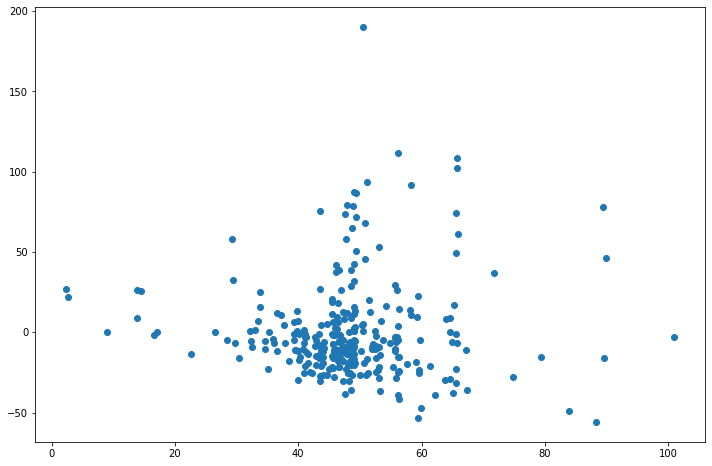

In [296]:
plt.figure(figsize=(12,8))
plt.scatter(fit6.predict(), fit6.resid);

Residual model looking modestly more random

### Parent Company and Ingredients

In [20]:
#Drop SCJ and PUIG dummy variables

PCIG_df = product_df[['Price_per_OZ', 'No_reviews', 'Hearts', 'Size','AHA', 'HA','AMOREPACIFIC', 'Clarins',
                    'Coty','Edgewell', 'Estee_Lauder', 'Independent', 'Kose', 'LG', 'LVMH',
                    'Loreal', 'Mark_Veder', 'PE', 'PG', 'Shiseido', 'SpaceNK', 'Unilever']]
PCIG_df.head(2)

,Price_per_OZ,No_reviews,Hearts,Size,AHA,HA,AMOREPACIFIC,Clarins,Coty,Edgewell,...,Kose,LG,LVMH,Loreal,Mark_Veder,PE,PG,Shiseido,SpaceNK,Unilever
0,40.236685,4000,266164,1.69,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,39.999999,3000,240692,1.70,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
PCIG_df.corr()

,Price_per_OZ,No_reviews,Hearts,Size,AHA,HA,AMOREPACIFIC,Clarins,Coty,Edgewell,...,Kose,LG,LVMH,Loreal,Mark_Veder,PE,PG,Shiseido,SpaceNK,Unilever
Price_per_OZ,1.000000,-0.192724,-0.174843,-0.160259,0.030940,-0.091644,-0.048245,0.186994,0.086639,-0.056310,...,-0.052401,-0.023487,-0.015875,-0.008834,-0.039369,0.116096,-0.052013,-0.008473,-0.060064,-0.037233
No_reviews,-0.192724,1.000000,0.715189,-0.030905,0.069687,-0.112029,-0.060738,-0.025668,-0.031715,0.047531,...,0.098082,0.016340,0.015145,-0.042788,0.032772,-0.052977,0.140084,0.025381,-0.033918,-0.038824
Hearts,-0.174843,0.715189,1.000000,-0.024139,-0.024023,-0.061063,-0.068545,-0.065501,-0.025150,0.085257,...,0.061847,-0.001281,0.035434,-0.055999,0.048265,-0.040611,0.116115,0.124198,-0.030163,0.010147
Size,-0.160259,-0.030905,-0.024139,1.000000,0.028999,0.031632,0.014611,-0.056094,-0.055359,-0.001588,...,-0.012064,-0.001588,-0.082505,-0.106874,-0.001588,0.099306,0.029291,0.051652,0.086220,-0.058738
AHA,0.030940,0.069687,-0.024023,0.028999,1.000000,-0.280683,0.084388,-0.048273,0.032459,-0.019537,...,-0.033956,-0.019537,0.025367,-0.051748,-0.019537,0.078442,-0.062762,-0.080249,-0.027677,0.025737
HA,-0.091644,-0.112029,-0.061063,0.031632,-0.280683,1.000000,0.028721,-0.073346,-0.024280,-0.049542,...,-0.017079,0.069604,0.051215,0.048852,0.069604,-0.056647,-0.006050,0.071792,-0.070183,-0.015868
AMOREPACIFIC,-0.048245,-0.060738,-0.068545,0.014611,0.084388,0.028721,1.000000,-0.024395,-0.024395,-0.009873,...,-0.017160,-0.009873,-0.050408,-0.048082,-0.009873,-0.048082,-0.031717,-0.040555,-0.013987,-0.060131
Clarins,0.186994,-0.025668,-0.065501,-0.056094,-0.048273,-0.073346,-0.024395,1.000000,-0.021053,-0.008520,...,-0.014809,-0.008520,-0.043501,-0.041494,-0.008520,-0.041494,-0.027372,-0.034998,-0.012070,-0.051892
Coty,0.086639,-0.031715,-0.025150,-0.055359,0.032459,-0.024280,-0.024395,-0.021053,1.000000,-0.008520,...,-0.014809,-0.008520,-0.043501,-0.041494,-0.008520,-0.041494,-0.027372,-0.034998,-0.012070,-0.051892
Edgewell,-0.056310,0.047531,0.085257,-0.001588,-0.019537,-0.049542,-0.009873,-0.008520,-0.008520,1.000000,...,-0.005993,-0.003448,-0.017606,-0.016793,-0.003448,-0.016793,-0.011078,-0.014164,-0.004885,-0.021001


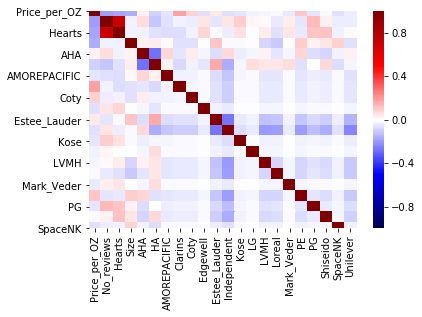

In [22]:
#Heat map of correlation
sns.heatmap(PCIG_df.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);

Compare to heat map of just Parent Companies

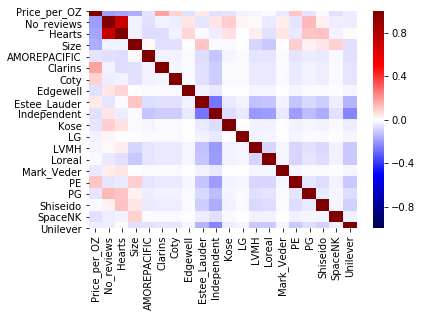

In [23]:
#Heat map of correlation
sns.heatmap(PC_df.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);

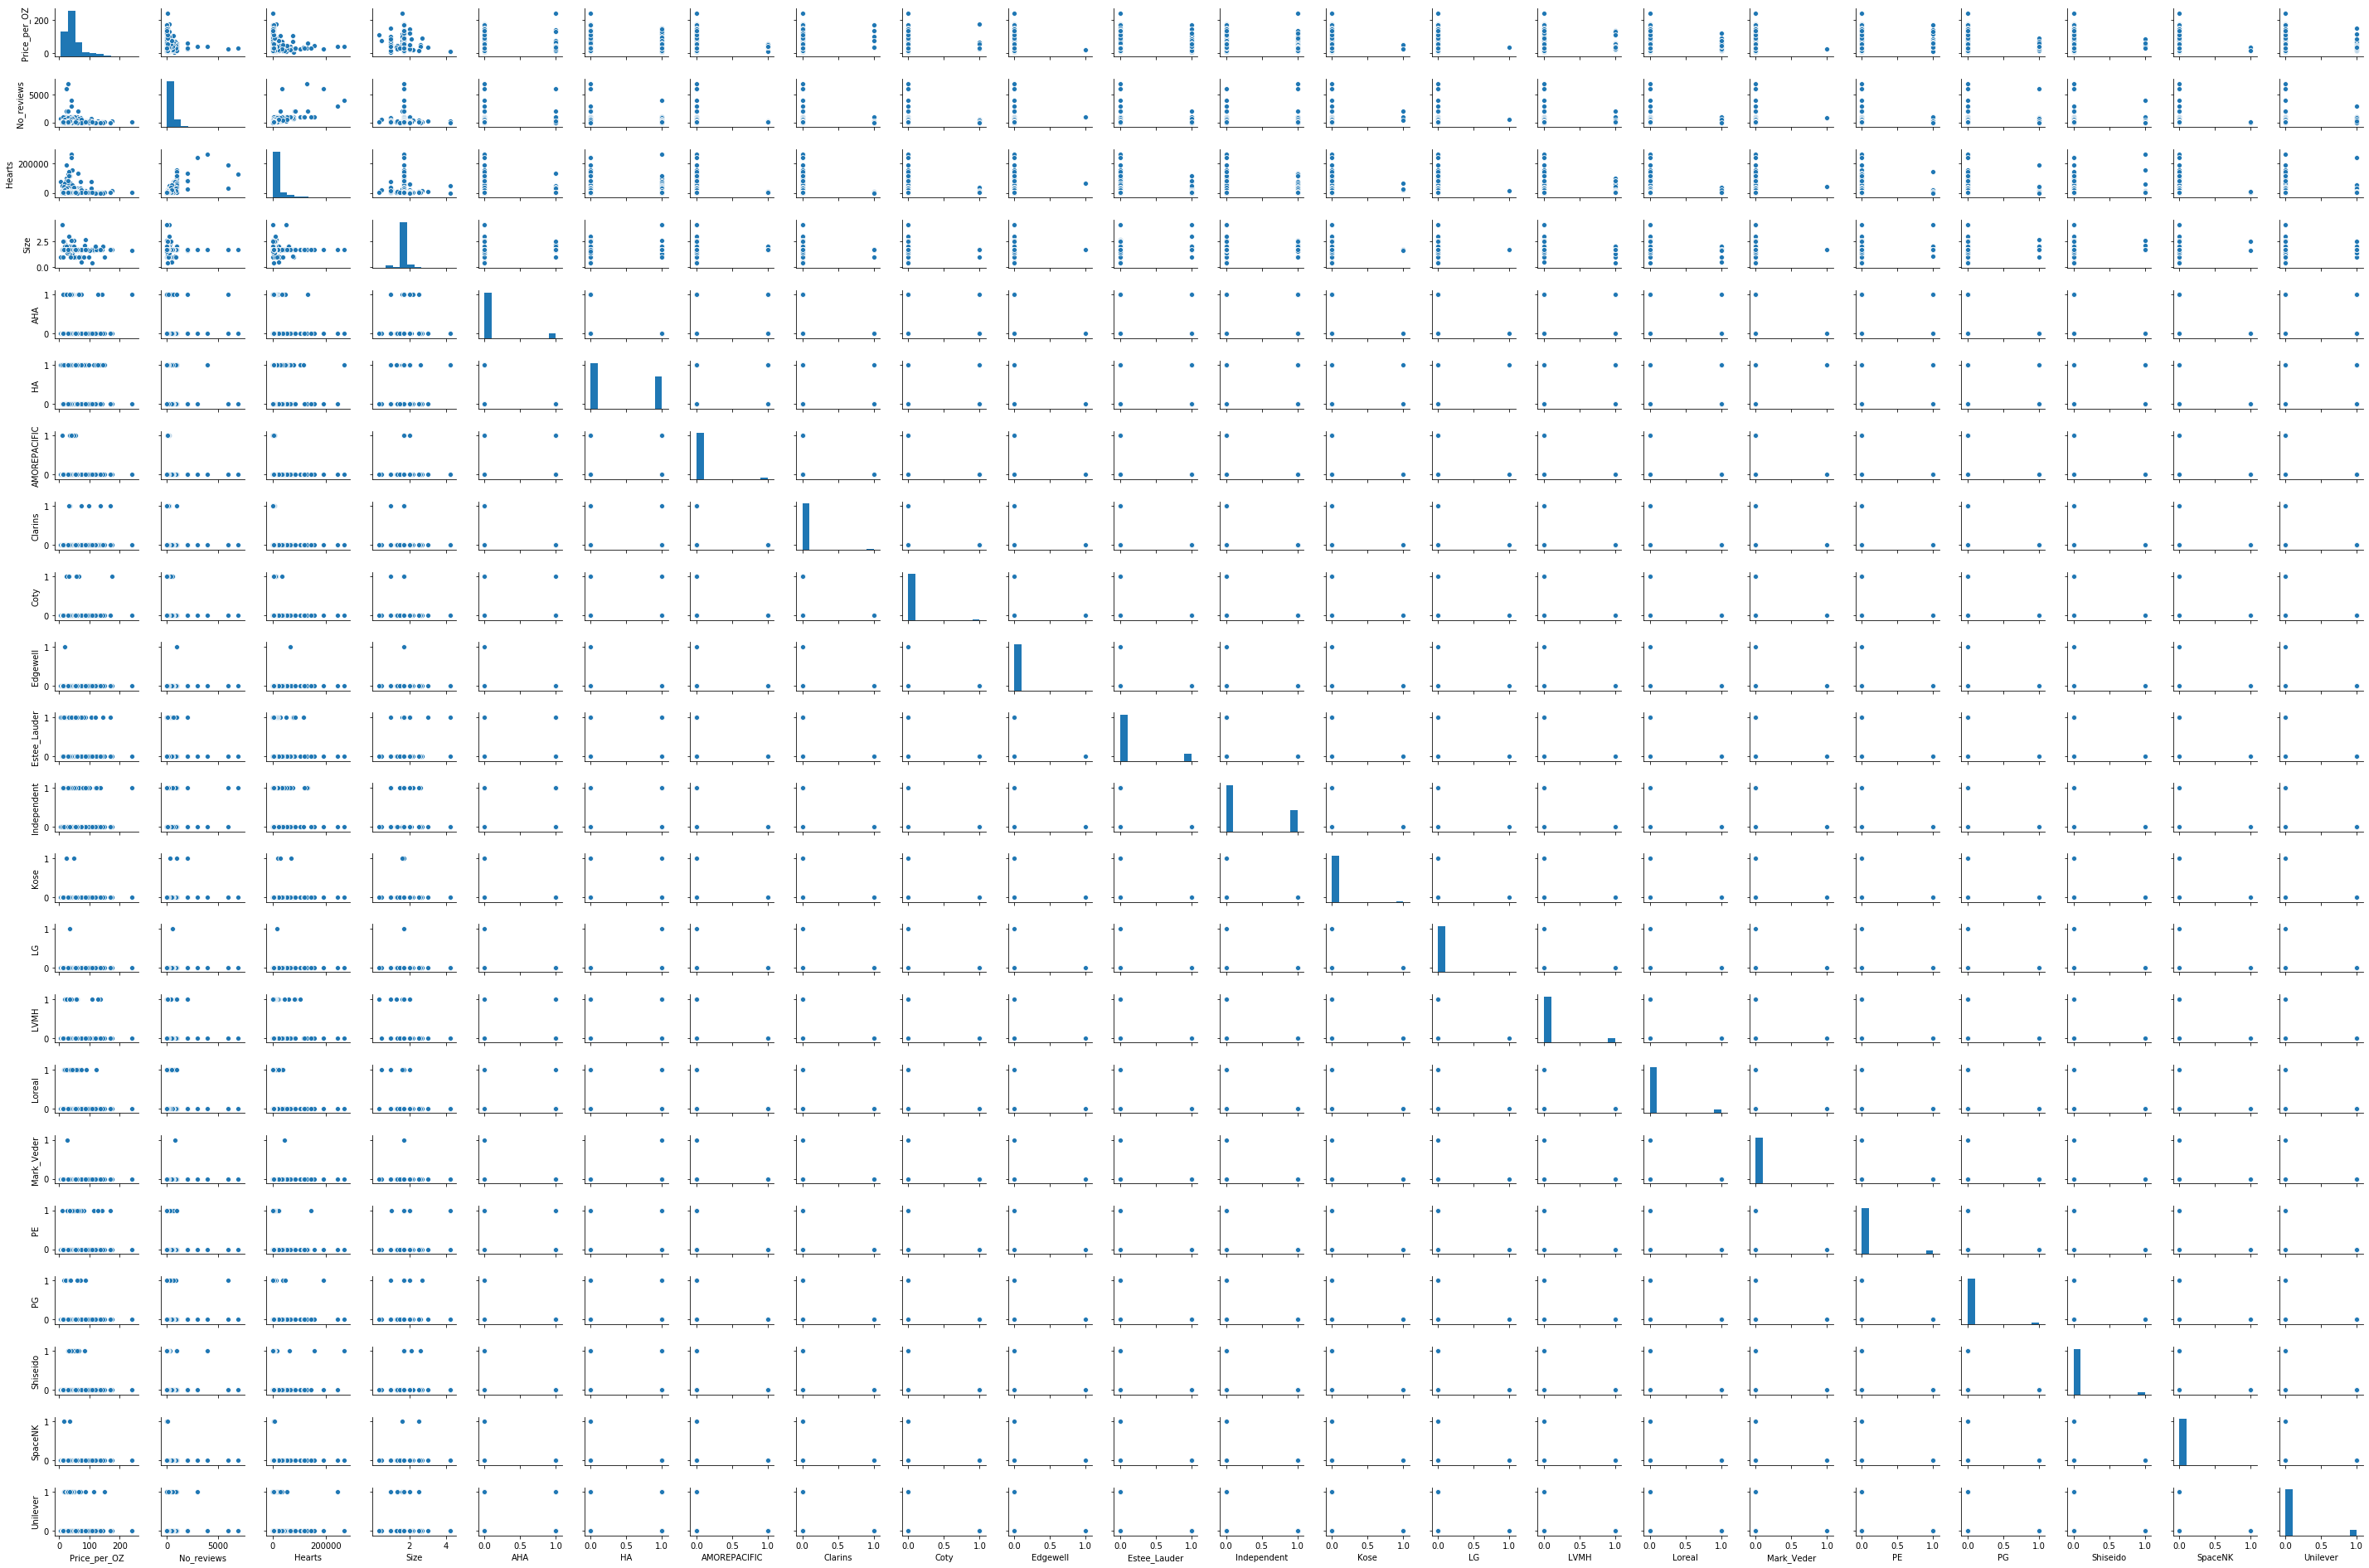

In [26]:
#Pairplots of all the variables as scatterplots
sns.pairplot(PCIG_df, height=1.2, aspect=1.5);

In [25]:
#Basic regression model for PCIG_df
y, X = patsy.dmatrices('Price_per_OZ ~ No_reviews + Hearts + Size + AHA + HA + AMOREPACIFIC + Clarins + Coty + Edgewell + Estee_Lauder + Independent + Kose + LG + LVMH + Loreal + Mark_Veder + PE + PG + Shiseido + SpaceNK + Unilever', data=PCIG_df, return_type="dataframe")

# Create the model
model = sm.OLS(y, X)

# Fit model to your training set
fit8 = model.fit()

# Print summary statistics of the model's performance
fit8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_per_OZ   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     2.205
Date:                Fri, 17 Jul 2020   Prob (F-statistic):            0.00220
Time:                        06:24:31   Log-Likelihood:                -1404.0
No. Observations:                 291   AIC:                             2852.
Df Residuals:                     269   BIC:                             2933.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       76.2806     17.289      4.412      0.000      42.242     110.319
No_reviews      -0.0061      0.004     -1.750      0.081      -0.013       0.001
Hearts       -6.402e-05   8.18e-05     -0.783      0.435      -0.000     9.7e-05
Size           -17.1242      5.762     -2.972      0.003     -28.469      -5.779
AHA              2.2482      6.563      0.343      0.732     -10.674      15.170
HA              -6.7161      4.065     -1.652      0.100     -14.719       1.287
AMOREPACIFIC    -3.9004     17.965     -0.217      0.828     -39.271      31.470
Clarins         43.9434     19.082      2.303      0.022       6.375      81.511
Coty            22.5444     19.060      1.183      0.238     -14.982      60.071
Edgewell       -19.7560     34.568     -0.572      0.568     -87.814      48.302
Estee_Lauder    13.4738     14.914      0.903      0.367     -15.889      42.836
Independent      3.9430     14.460      0.273      0.785     -24.527      32.413
Kose            -4.5733     22.976     -0.199      0.842     -49.808      40.662
LG              -0.4549     34.377     -0.013      0.989     -68.136      67.226
LVMH             5.0452     15.465      0.326      0.745     -25.403      35.494
Loreal           3.7717     15.560      0.242      0.809     -26.864      34.407
Mark_Veder      -6.1587     34.439     -0.179      0.858     -73.963      61.646
PE              20.5041     15.635      1.311      0.191     -10.279      51.287
PG               4.1539     17.257      0.241      0.810     -29.822      38.130
Shiseido        10.1870     16.172      0.630      0.529     -21.652      42.026
SpaceNK        -15.6640     26.442     -0.592      0.554     -67.724      36.396
Unilever         2.3518     15.114      0.156      0.876     -27.405      32.109
==============================================================================
Omnibus:                      143.149   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              703.309
Skew:                           2.045   Prob(JB):                    1.90e-153
Kurtosis:                       9.424   Cond. No.                     1.24e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### R^2 is up slightly from 0.136 with just the parent company

In [302]:
#Pull out the P-values > 0.9 (LG, PUIG, SCJ)
#Basic regression model for PCIG_df
y, X = patsy.dmatrices('Price_per_OZ ~ No_reviews + Hearts + Size + AHA + HA + AMOREPACIFIC + Clarins + Coty + Edgewell + Estee_Lauder + Independent + Kose + LVMH + Loreal + Mark_Veder + PE + PG + Shiseido + SpaceNK + Unilever', data=PCIG_df, return_type="dataframe")

# Create the model
model = sm.OLS(y, X)

# Fit model to your training set
fit8 = model.fit()

# Print summary statistics of the model's performance
fit8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_per_OZ   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     2.323
Date:                Thu, 16 Jul 2020   Prob (F-statistic):            0.00138
Time:                        23:31:02   Log-Likelihood:                -1404.0
No. Observations:                 291   AIC:                             2850.
Df Residuals:                     270   BIC:                             2927.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       76.2066     16.329      4.667      0.000      44.058     108.355
No_reviews      -0.0062      0.004     -1.754      0.081      -0.013       0.001
Hearts       -6.402e-05   8.17e-05     -0.784      0.434      -0.000    9.67e-05
Size           -17.1241      5.752     -2.977      0.003     -28.448      -5.800
AHA              2.2472      6.551      0.343      0.732     -10.650      15.144
HA              -6.7187      4.052     -1.658      0.098     -14.697       1.260
AMOREPACIFIC    -3.8249     17.005     -0.225      0.822     -37.303      29.653
Clarins         44.0178     18.201      2.418      0.016       8.185      79.851
Coty            22.6194     18.164      1.245      0.214     -13.142      58.380
Edgewell       -19.6815     34.043     -0.578      0.564     -86.705      47.342
Estee_Lauder    13.5495     13.748      0.986      0.325     -13.517      40.616
Independent      4.0180     13.279      0.303      0.762     -22.125      30.161
Kose            -4.4979     22.218     -0.202      0.840     -48.241      39.245
LVMH             5.1207     14.347      0.357      0.721     -23.125      33.366
Loreal           3.8470     14.454      0.266      0.790     -24.610      32.304
Mark_Veder      -6.0817     33.882     -0.179      0.858     -72.787      60.624
PE              20.5791     14.545      1.415      0.158      -8.057      49.215
PG               4.2293     16.258      0.260      0.795     -27.780      36.238
Shiseido        10.2626     15.100      0.680      0.497     -19.467      39.992
SpaceNK        -15.5902     25.798     -0.604      0.546     -66.382      35.202
Unilever         2.4270     13.980      0.174      0.862     -25.096      29.950
==============================================================================
Omnibus:                      143.149   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              703.300
Skew:                           2.045   Prob(JB):                    1.91e-153
Kurtosis:                       9.424   Cond. No.                     1.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
y_pred = fit8.predict(sm.add_constant(X))

plt.scatter(y_pred,y-y_pred,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,0,1000))
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

No change in R^2

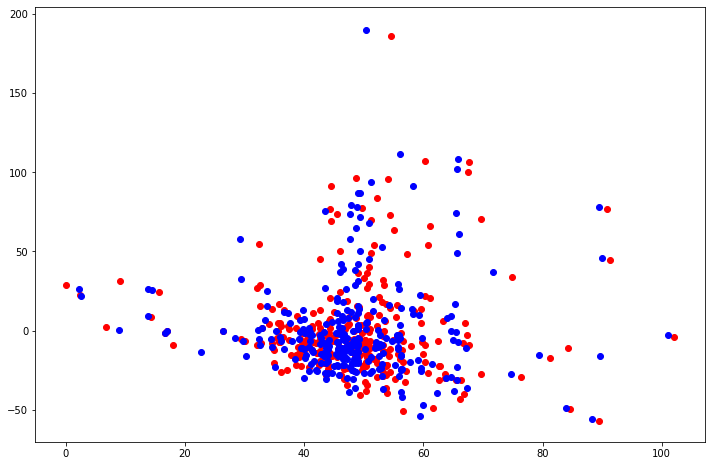

In [303]:
plt.figure(figsize=(12,8))
plt.scatter(fit8.predict(), fit8.resid, c = 'red')
plt.scatter(fit6.predict(), fit6.resid, c = 'blue');

In [ ]:
y_pred = results.predict(sm.add_constant(X))

plt.scatter(y_pred,y-y_pred,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,0,1000))
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

Residual plot with red dots representing parent company with ingredients and blue dots representing just the parent comapny

### Large Beauty Parents with Ingredients

Looking at large beauty houses with high end luxury brands with the compaiess focusing solely on beauty products (including PG despite beging a CPG company as SK_II is its premier beauty brand and largely competes with brands in
this category)

In [305]:
LBIG_df = product_df[['Price_per_OZ', 'No_reviews', 'Hearts', 'Size','AHA', 'HA','AMOREPACIFIC', 
                    'Estee_Lauder', 'LVMH',
                    'Loreal',  'PG','Shiseido']]
LBIG_df.head(2)

,Price_per_OZ,No_reviews,Hearts,Size,AHA,HA,AMOREPACIFIC,Estee_Lauder,LVMH,Loreal,PG,Shiseido
0,40.236685,4000,266164,1.69,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,39.999999,3000,240692,1.70,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [306]:
LBIG_df.corr()

,Price_per_OZ,No_reviews,Hearts,Size,AHA,HA,AMOREPACIFIC,Estee_Lauder,LVMH,Loreal,PG,Shiseido
Price_per_OZ,1.000000,-0.192724,-0.174843,-0.160259,0.030940,-0.091644,-0.048245,0.044895,-0.015875,-0.008834,-0.052013,-0.008473
No_reviews,-0.192724,1.000000,0.715189,-0.030905,0.069687,-0.112029,-0.060738,-0.053382,0.015145,-0.042788,0.140084,0.025381
Hearts,-0.174843,0.715189,1.000000,-0.024139,-0.024023,-0.061063,-0.068545,-0.009621,0.035434,-0.055999,0.116115,0.124198
Size,-0.160259,-0.030905,-0.024139,1.000000,0.028999,0.031632,0.014611,0.116871,-0.082505,-0.106874,0.029291,0.051652
AHA,0.030940,0.069687,-0.024023,0.028999,1.000000,-0.280683,0.084388,-0.066178,0.025367,-0.051748,-0.062762,-0.080249
HA,-0.091644,-0.112029,-0.061063,0.031632,-0.280683,1.000000,0.028721,0.169440,0.051215,0.048852,-0.006050,0.071792
AMOREPACIFIC,-0.048245,-0.060738,-0.068545,0.014611,0.084388,0.028721,1.000000,-0.067119,-0.050408,-0.048082,-0.031717,-0.040555
Estee_Lauder,0.044895,-0.053382,-0.009621,0.116871,-0.066178,0.169440,-0.067119,1.000000,-0.119686,-0.114164,-0.075308,-0.096291
LVMH,-0.015875,0.015145,0.035434,-0.082505,0.025367,0.051215,-0.050408,-0.119686,1.000000,-0.085740,-0.056558,-0.072318
Loreal,-0.008834,-0.042788,-0.055999,-0.106874,-0.051748,0.048852,-0.048082,-0.114164,-0.085740,1.000000,-0.053949,-0.068981


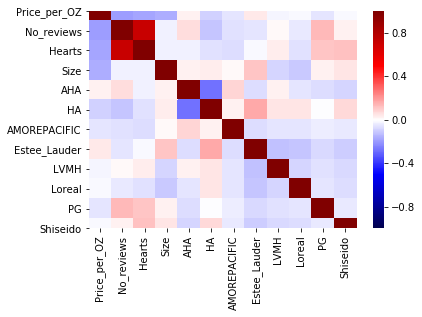

In [307]:
#Heat map of correlation
sns.heatmap(LBIG_df.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);

In [ ]:
#Pairplots of all the variables as scatterplots
sns.pairplot(LBIG_df, height=1.2, aspect=1.5);

In [308]:
#Basic regression model for LBIG_df
y, X = patsy.dmatrices('Price_per_OZ ~ No_reviews + Hearts + Size + AHA + HA + AMOREPACIFIC + Estee_Lauder + LVMH + Loreal + PG + Shiseido', data=PCIG_df, return_type="dataframe")

# Create the model
model = sm.OLS(y, X)

# Fit model to your training set
fit9 = model.fit()

# Print summary statistics of the model's performance
fit9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_per_OZ   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     2.504
Date:                Thu, 16 Jul 2020   Prob (F-statistic):            0.00512
Time:                        23:32:49   Log-Likelihood:                -1413.4
No. Observations:                 291   AIC:                             2851.
Df Residuals:                     279   BIC:                             2895.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       84.6070     10.292      8.220      0.000      64.346     104.868
No_reviews      -0.0065      0.004     -1.844      0.066      -0.013       0.000
Hearts           -8e-05    8.2e-05     -0.975      0.330      -0.000    8.15e-05
Size           -17.5039      5.766     -3.035      0.003     -28.855      -6.153
AHA              2.5070      6.595      0.380      0.704     -10.475      15.489
HA              -7.3958      4.055     -1.824      0.069     -15.378       0.586
AMOREPACIFIC   -11.1950     11.585     -0.966      0.335     -34.000      11.610
Estee_Lauder     6.6050      5.743      1.150      0.251      -4.699      17.909
LVMH            -1.8750      6.995     -0.268      0.789     -15.644      11.894
Loreal          -3.3594      7.274     -0.462      0.645     -17.679      10.960
PG              -2.3019     10.487     -0.219      0.826     -22.946      18.342
Shiseido         3.6274      8.496      0.427      0.670     -13.098      20.353
==============================================================================
Omnibus:                      145.130   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              660.574
Skew:                           2.121   Prob(JB):                    3.62e-144
Kurtosis:                       9.040   Cond. No.                     2.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Not that interesting

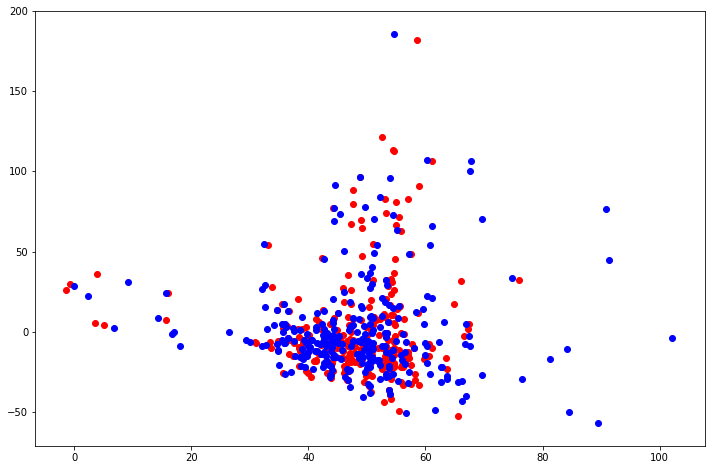

In [309]:
plt.figure(figsize=(12,8))
plt.scatter(fit9.predict(), fit9.resid, c = 'red')
plt.scatter(fit8.predict(), fit8.resid, c = 'blue');



The red dots Large Beauty Houses with blue dots representing all parent companies

### Independent Beauty Companies

In [310]:
Indie_df = product_df[['Price_per_OZ', 'No_reviews', 'Hearts', 'Size','AHA', 'HA','Independent']]

Indie_df.head(2)

,Price_per_OZ,No_reviews,Hearts,Size,AHA,HA,Independent
0,40.236685,4000,266164,1.69,0,1,0.0
1,39.999999,3000,240692,1.70,0,0,0.0


In [311]:
Indie_df.corr()

,Price_per_OZ,No_reviews,Hearts,Size,AHA,HA,Independent
Price_per_OZ,1.000000,-0.192724,-0.174843,-0.160259,0.030940,-0.091644,-0.055103
No_reviews,-0.192724,1.000000,0.715189,-0.030905,0.069687,-0.112029,0.053780
Hearts,-0.174843,0.715189,1.000000,-0.024139,-0.024023,-0.061063,-0.037759
Size,-0.160259,-0.030905,-0.024139,1.000000,0.028999,0.031632,-0.012386
AHA,0.030940,0.069687,-0.024023,0.028999,1.000000,-0.280683,0.072538
HA,-0.091644,-0.112029,-0.061063,0.031632,-0.280683,1.000000,-0.163008
Independent,-0.055103,0.053780,-0.037759,-0.012386,0.072538,-0.163008,1.000000


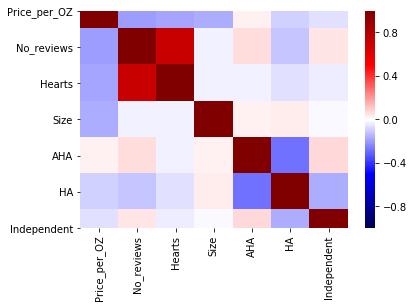

In [312]:
#Heat map of correlation
sns.heatmap(Indie_df.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);

#### Compare to Large Beauty Houses

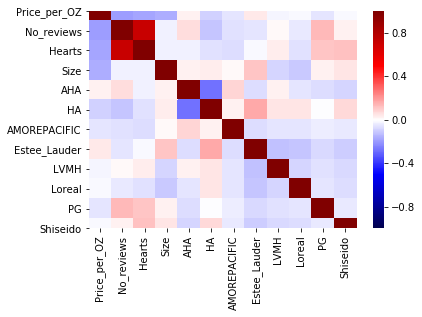

In [313]:
sns.heatmap(LBIG_df.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);

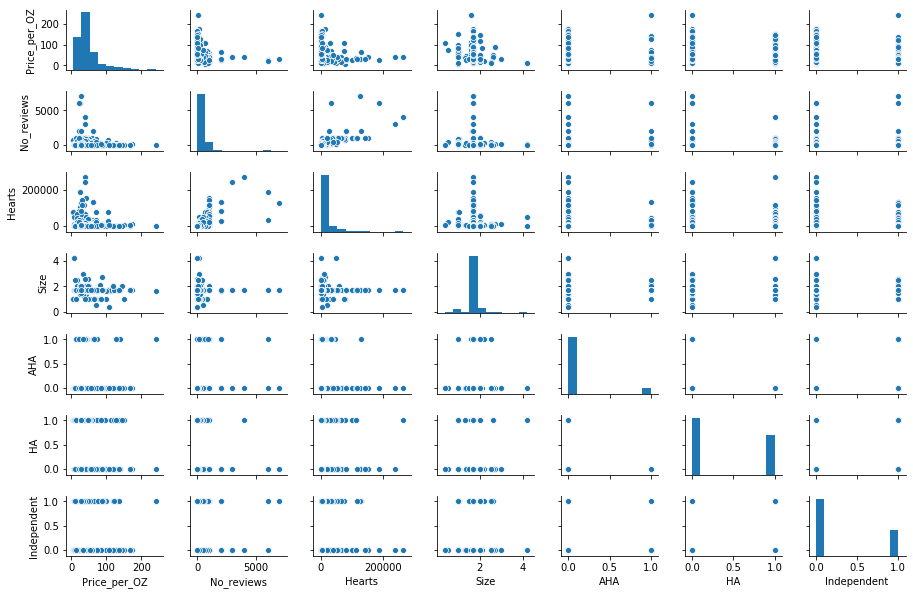

In [241]:
#Pairplots of all the variables as scatterplots
sns.pairplot(Indie_df, height=1.2, aspect=1.5);

In [314]:
#Basic regression model for Indie_df
y, X = patsy.dmatrices('Price_per_OZ ~ No_reviews + Hearts + Size + AHA + HA + Independent', data=PCIG_df, return_type="dataframe")

# Create the model
model = sm.OLS(y, X)

# Fit model to your training set
fit10 = model.fit()

# Print summary statistics of the model's performance
fit10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_per_OZ   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     4.369
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           0.000307
Time:                        23:33:11   Log-Likelihood:                -1414.2
No. Observations:                 291   AIC:                             2842.
Df Residuals:                     284   BIC:                             2868.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      84.5714     10.130      8.349      0.000      64.632     104.511
No_reviews     -0.0064      0.003     -1.823      0.069      -0.013       0.001
Hearts       -7.93e-05   8.08e-05     -0.981      0.327      -0.000    7.98e-05
Size          -16.3169      5.638     -2.894      0.004     -27.414      -5.219
AHA             1.8699      6.488      0.288      0.773     -10.901      14.641
HA             -7.6217      3.979     -1.915      0.056     -15.455       0.211
Independent    -5.0747      4.076     -1.245      0.214     -13.098       2.948
==============================================================================
Omnibus:                      148.676   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              702.461
Skew:                           2.166   Prob(JB):                    2.90e-153
Kurtosis:                       9.258   Cond. No.                     2.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Also not that interesting

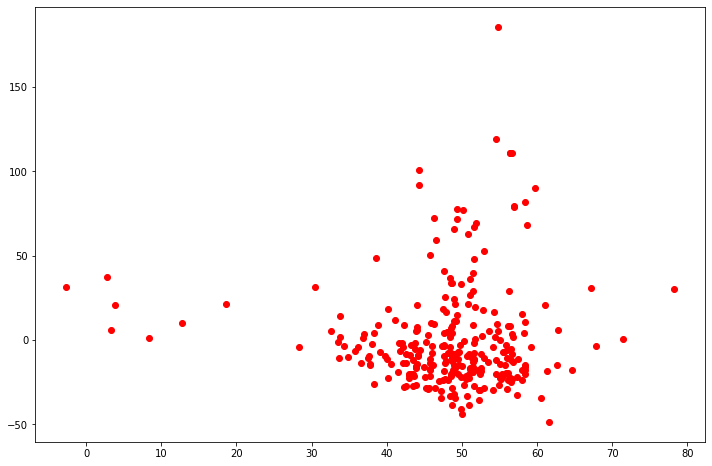

In [315]:
plt.figure(figsize=(12,8))
plt.scatter(fit10.predict(), fit10.resid, c = 'red');


### Private Equity/Venture Capital Led Beauty Firms

In [316]:
PE_df = product_df[['Price_per_OZ', 'No_reviews', 'Hearts', 'Size','AHA', 'HA','PE']]

PE_df.head(2)

,Price_per_OZ,No_reviews,Hearts,Size,AHA,HA,PE
0,40.236685,4000,266164,1.69,0,1,0.0
1,39.999999,3000,240692,1.70,0,0,0.0


In [317]:
PE_df.corr()

,Price_per_OZ,No_reviews,Hearts,Size,AHA,HA,PE
Price_per_OZ,1.000000,-0.192724,-0.174843,-0.160259,0.030940,-0.091644,0.116096
No_reviews,-0.192724,1.000000,0.715189,-0.030905,0.069687,-0.112029,-0.052977
Hearts,-0.174843,0.715189,1.000000,-0.024139,-0.024023,-0.061063,-0.040611
Size,-0.160259,-0.030905,-0.024139,1.000000,0.028999,0.031632,0.099306
AHA,0.030940,0.069687,-0.024023,0.028999,1.000000,-0.280683,0.078442
HA,-0.091644,-0.112029,-0.061063,0.031632,-0.280683,1.000000,-0.056647
PE,0.116096,-0.052977,-0.040611,0.099306,0.078442,-0.056647,1.000000


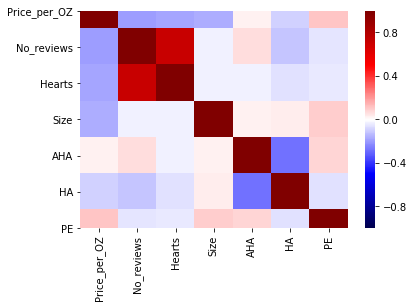

In [319]:
#Heat map of correlation
sns.heatmap(PE_df.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);

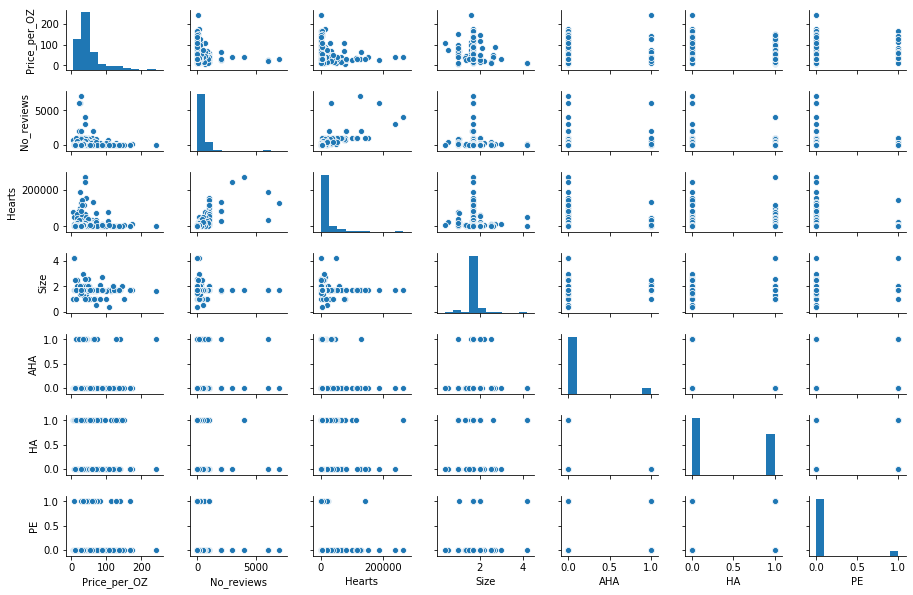

In [320]:
#Pairplots of all the variables as scatterplots
sns.pairplot(PE_df, height=1.2, aspect=1.5);

In [324]:
#Basic regression model for Indie_df
y, X = patsy.dmatrices('Price_per_OZ ~ No_reviews + Hearts + Size + AHA + HA + PE', data=PCIG_df, return_type="dataframe")

# Create the model
model = sm.OLS(y, X)

# Fit model to your training set
fit11 = model.fit()

# Print summary statistics of the model's performance
fit11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_per_OZ   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     4.840
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           0.000101
Time:                        23:34:25   Log-Likelihood:                -1412.9
No. Observations:                 291   AIC:                             2840.
Df Residuals:                     284   BIC:                             2866.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     83.2383      9.964      8.354      0.000      63.626     102.850
No_reviews    -0.0065      0.003     -1.871      0.062      -0.013       0.000
Hearts     -6.961e-05      8e-05     -0.870      0.385      -0.000    8.79e-05
Size         -17.3834      5.639     -3.083      0.002     -28.483      -6.283
AHA            0.8896      6.471      0.137      0.891     -11.848      13.628
HA            -6.5319      3.923     -1.665      0.097     -14.254       1.191
PE            14.3525      7.049      2.036      0.043       0.478      28.227
==============================================================================
Omnibus:                      148.124   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.405
Skew:                           2.153   Prob(JB):                    1.10e-153
Kurtosis:                       9.290   Cond. No.                     2.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [325]:
#Pull out AHA
#Basic regression model for Indie_df
y, X = patsy.dmatrices('Price_per_OZ ~ No_reviews + Hearts + Size + HA + Independent', data=PCIG_df, return_type="dataframe")

# Create the model
model = sm.OLS(y, X)

# Fit model to your training set
fit11 = model.fit()

# Print summary statistics of the model's performance
fit11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_per_OZ   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     5.244
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           0.000127
Time:                        23:34:29   Log-Likelihood:                -1414.3
No. Observations:                 291   AIC:                             2841.
Df Residuals:                     285   BIC:                             2863.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      84.7709     10.090      8.401      0.000      64.910     104.631
No_reviews     -0.0063      0.003     -1.807      0.072      -0.013       0.001
Hearts      -8.163e-05   8.03e-05     -1.017      0.310      -0.000    7.64e-05
Size          -16.2509      5.624     -2.889      0.004     -27.321      -5.180
HA             -7.9311      3.826     -2.073      0.039     -15.461      -0.401
Independent    -5.0554      4.069     -1.242      0.215     -13.064       2.953
==============================================================================
Omnibus:                      150.018   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              723.640
Skew:                           2.180   Prob(JB):                    7.31e-158
Kurtosis:                       9.377   Cond. No.                     2.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

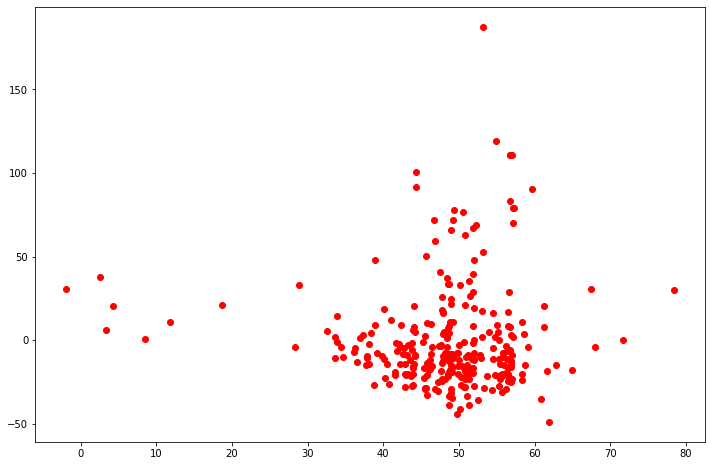

In [326]:
plt.figure(figsize=(12,8))
plt.scatter(fit11.predict(), fit11.resid, c = 'red');


### Price per Ounce in Log Scale

In [489]:
#Create new column with price/oz of product to make a more comporable target across the dataframe
product_df['Log_Price_OZ'] = np.log(product_df['Price_per_OZ'])
product_df.head(3)

,Name,Brand,Price,No_reviews,Hearts,Size,PC,Ingredients_y,AHA,HA,...,Mark_Veder,PE,PG,Puig,SCJ,Shiseido,SpaceNK,Unilever,Price_per_OZ,Log_Price_OZ
0,Protini™ Polypeptide Moisturizer,Drunk Elephant,68.0,4000,266164,1.69,Shiseido,HA,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40.236685,3.694779
1,The Water Cream,Tatcha,68.0,3000,240692,1.70,Unilever,NaN,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,39.999999,3.688879
2,Crème de la Mer Moisturizer,La Mer,180.0,667,75353,1.70,Estee_Lauder,NaN,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.882350,4.662329


In [494]:
Log_df = product_df[['Log_Price_OZ', 'No_reviews', 'Hearts', 'Size','AHA', 'HA','AMOREPACIFIC', 'Clarins',
                    'Coty','Edgewell', 'Estee_Lauder', 'Independent', 'Kose', 'LG', 'LVMH',
                    'Loreal', 'Mark_Veder', 'PE', 'PG', 'Puig', 'SCJ', 'Shiseido', 'SpaceNK', 'Unilever']]
Log_df.head(2)

,Log_Price_OZ,No_reviews,Hearts,Size,AHA,HA,AMOREPACIFIC,Clarins,Coty,Edgewell,...,LVMH,Loreal,Mark_Veder,PE,PG,Puig,SCJ,Shiseido,SpaceNK,Unilever
0,3.694779,4000,266164,1.69,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.688879,3000,240692,1.70,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [495]:
#Basic regression model for PCIG_df
y, X = patsy.dmatrices('Log_Price_OZ ~ No_reviews + Hearts + Size + AHA + HA + AMOREPACIFIC + Clarins + Coty + Edgewell + Estee_Lauder + Independent + Kose + LG + LVMH + Loreal + Mark_Veder + PE + PG + Puig + SCJ + Shiseido + SpaceNK + Unilever', data=Log_df, return_type="dataframe")

# Create the model
model = sm.OLS(y, X)

# Fit model to your training set
fit12 = model.fit()

# Print summary statistics of the model's performance
fit12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Log_Price_OZ   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     2.641
Date:                Fri, 17 Jul 2020   Prob (F-statistic):           0.000140
Time:                        03:41:14   Log-Likelihood:                -223.90
No. Observations:                 291   AIC:                             493.8
Df Residuals:                     268   BIC:                             578.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.2745      0.180     23.693      0.000       3.919       4.630
No_reviews   -9.776e-05    6.1e-05     -1.601      0.110      -0.000    2.24e-05
Hearts       -1.616e-06   1.42e-06     -1.137      0.256   -4.41e-06    1.18e-06
Size            -0.4387      0.100     -4.384      0.000      -0.636      -0.242
AHA             -0.0196      0.114     -0.172      0.863      -0.244       0.205
HA              -0.1308      0.071     -1.846      0.066      -0.270       0.009
AMOREPACIFIC     0.1466      0.197      0.743      0.458      -0.242       0.535
Clarins          0.7922      0.223      3.550      0.000       0.353       1.232
Coty             0.5043      0.222      2.272      0.024       0.067       0.941
Edgewell        -0.4882      0.522     -0.934      0.351      -1.517       0.540
Estee_Lauder     0.3868      0.110      3.524      0.000       0.171       0.603
Independent      0.2219      0.089      2.489      0.013       0.046       0.397
Kose             0.0618      0.307      0.201      0.841      -0.543       0.666
LG               0.2506      0.521      0.481      0.631      -0.776       1.277
LVMH             0.2506      0.127      1.979      0.049       0.001       0.500
Loreal           0.2754      0.130      2.111      0.036       0.019       0.532
Mark_Veder       0.0293      0.522      0.056      0.955      -0.998       1.057
PE               0.5407      0.132      4.082      0.000       0.280       0.801
PG               0.2163      0.179      1.207      0.229      -0.137       0.569
Puig             0.2181      0.268      0.813      0.417      -0.310       0.746
SCJ              0.3505      0.521      0.673      0.502      -0.675       1.376
Shiseido         0.4980      0.149      3.345      0.001       0.205       0.791
SpaceNK         -0.2311      0.375     -0.616      0.538      -0.969       0.507
Unilever         0.2508      0.114      2.201      0.029       0.026       0.475
==============================================================================
Omnibus:                        9.846   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               18.765
Skew:                           0.065   Prob(JB):                     8.42e-05
Kurtosis:                       4.237   Cond. No.                     8.91e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.16e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Lasso Coefficients

In [498]:
LASSO_df = product_df[['Price_per_OZ', 'Hearts', 'Size','HA', 'Independent']]
LASSO_df.head(2)

,Price_per_OZ,Hearts,Size,HA,Independent
0,40.236685,266164,1.69,1,0.0
1,39.999999,240692,1.70,0,0.0


In [499]:
LASSO_df.corr()

,Price_per_OZ,Hearts,Size,HA,Independent
Price_per_OZ,1.000000,-0.174843,-0.160259,-0.091644,-0.055103
Hearts,-0.174843,1.000000,-0.024139,-0.061063,-0.037759
Size,-0.160259,-0.024139,1.000000,0.031632,-0.012386
HA,-0.091644,-0.061063,0.031632,1.000000,-0.163008
Independent,-0.055103,-0.037759,-0.012386,-0.163008,1.000000


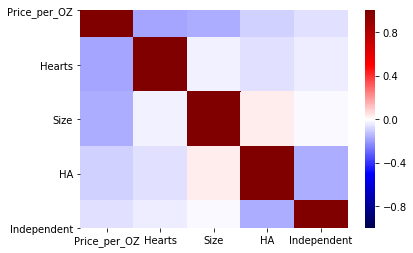

In [500]:
#Heat map of correlation
sns.heatmap(LASSO_df.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);

In [501]:
#Basic regression model for PCIG_df
y, X = patsy.dmatrices('Price_per_OZ ~ Hearts + Size + HA + Independent', data=LASSO_df, return_type="dataframe")

# Create the model
model = sm.OLS(y, X)

# Fit model to your training set
fit13 = model.fit()

# Print summary statistics of the model's performance
fit13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_per_OZ   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     5.694
Date:                Fri, 17 Jul 2020   Prob (F-statistic):           0.000201
Time:                        03:42:13   Log-Likelihood:                -1415.9
No. Observations:                 291   AIC:                             2842.
Df Residuals:                     286   BIC:                             2860.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      83.9733     10.120      8.298      0.000      64.054     103.893
Hearts         -0.0002   5.62e-05     -3.305      0.001      -0.000   -7.51e-05
Size          -16.0896      5.646     -2.850      0.005     -27.202      -4.977
HA             -7.3783      3.829     -1.927      0.055     -14.914       0.157
Independent    -5.7992      4.064     -1.427      0.155     -13.798       2.200
==============================================================================
Omnibus:                      150.751   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              728.109
Skew:                           2.193   Prob(JB):                    7.82e-159
Kurtosis:                       9.389   Cond. No.                     2.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From some basic analysis, it appears that the most interesting model, although still carrying a low R^2 value, will be PCIG_df which contains all the various parent companies and all the ingredients

### Moving Forward with Analysis

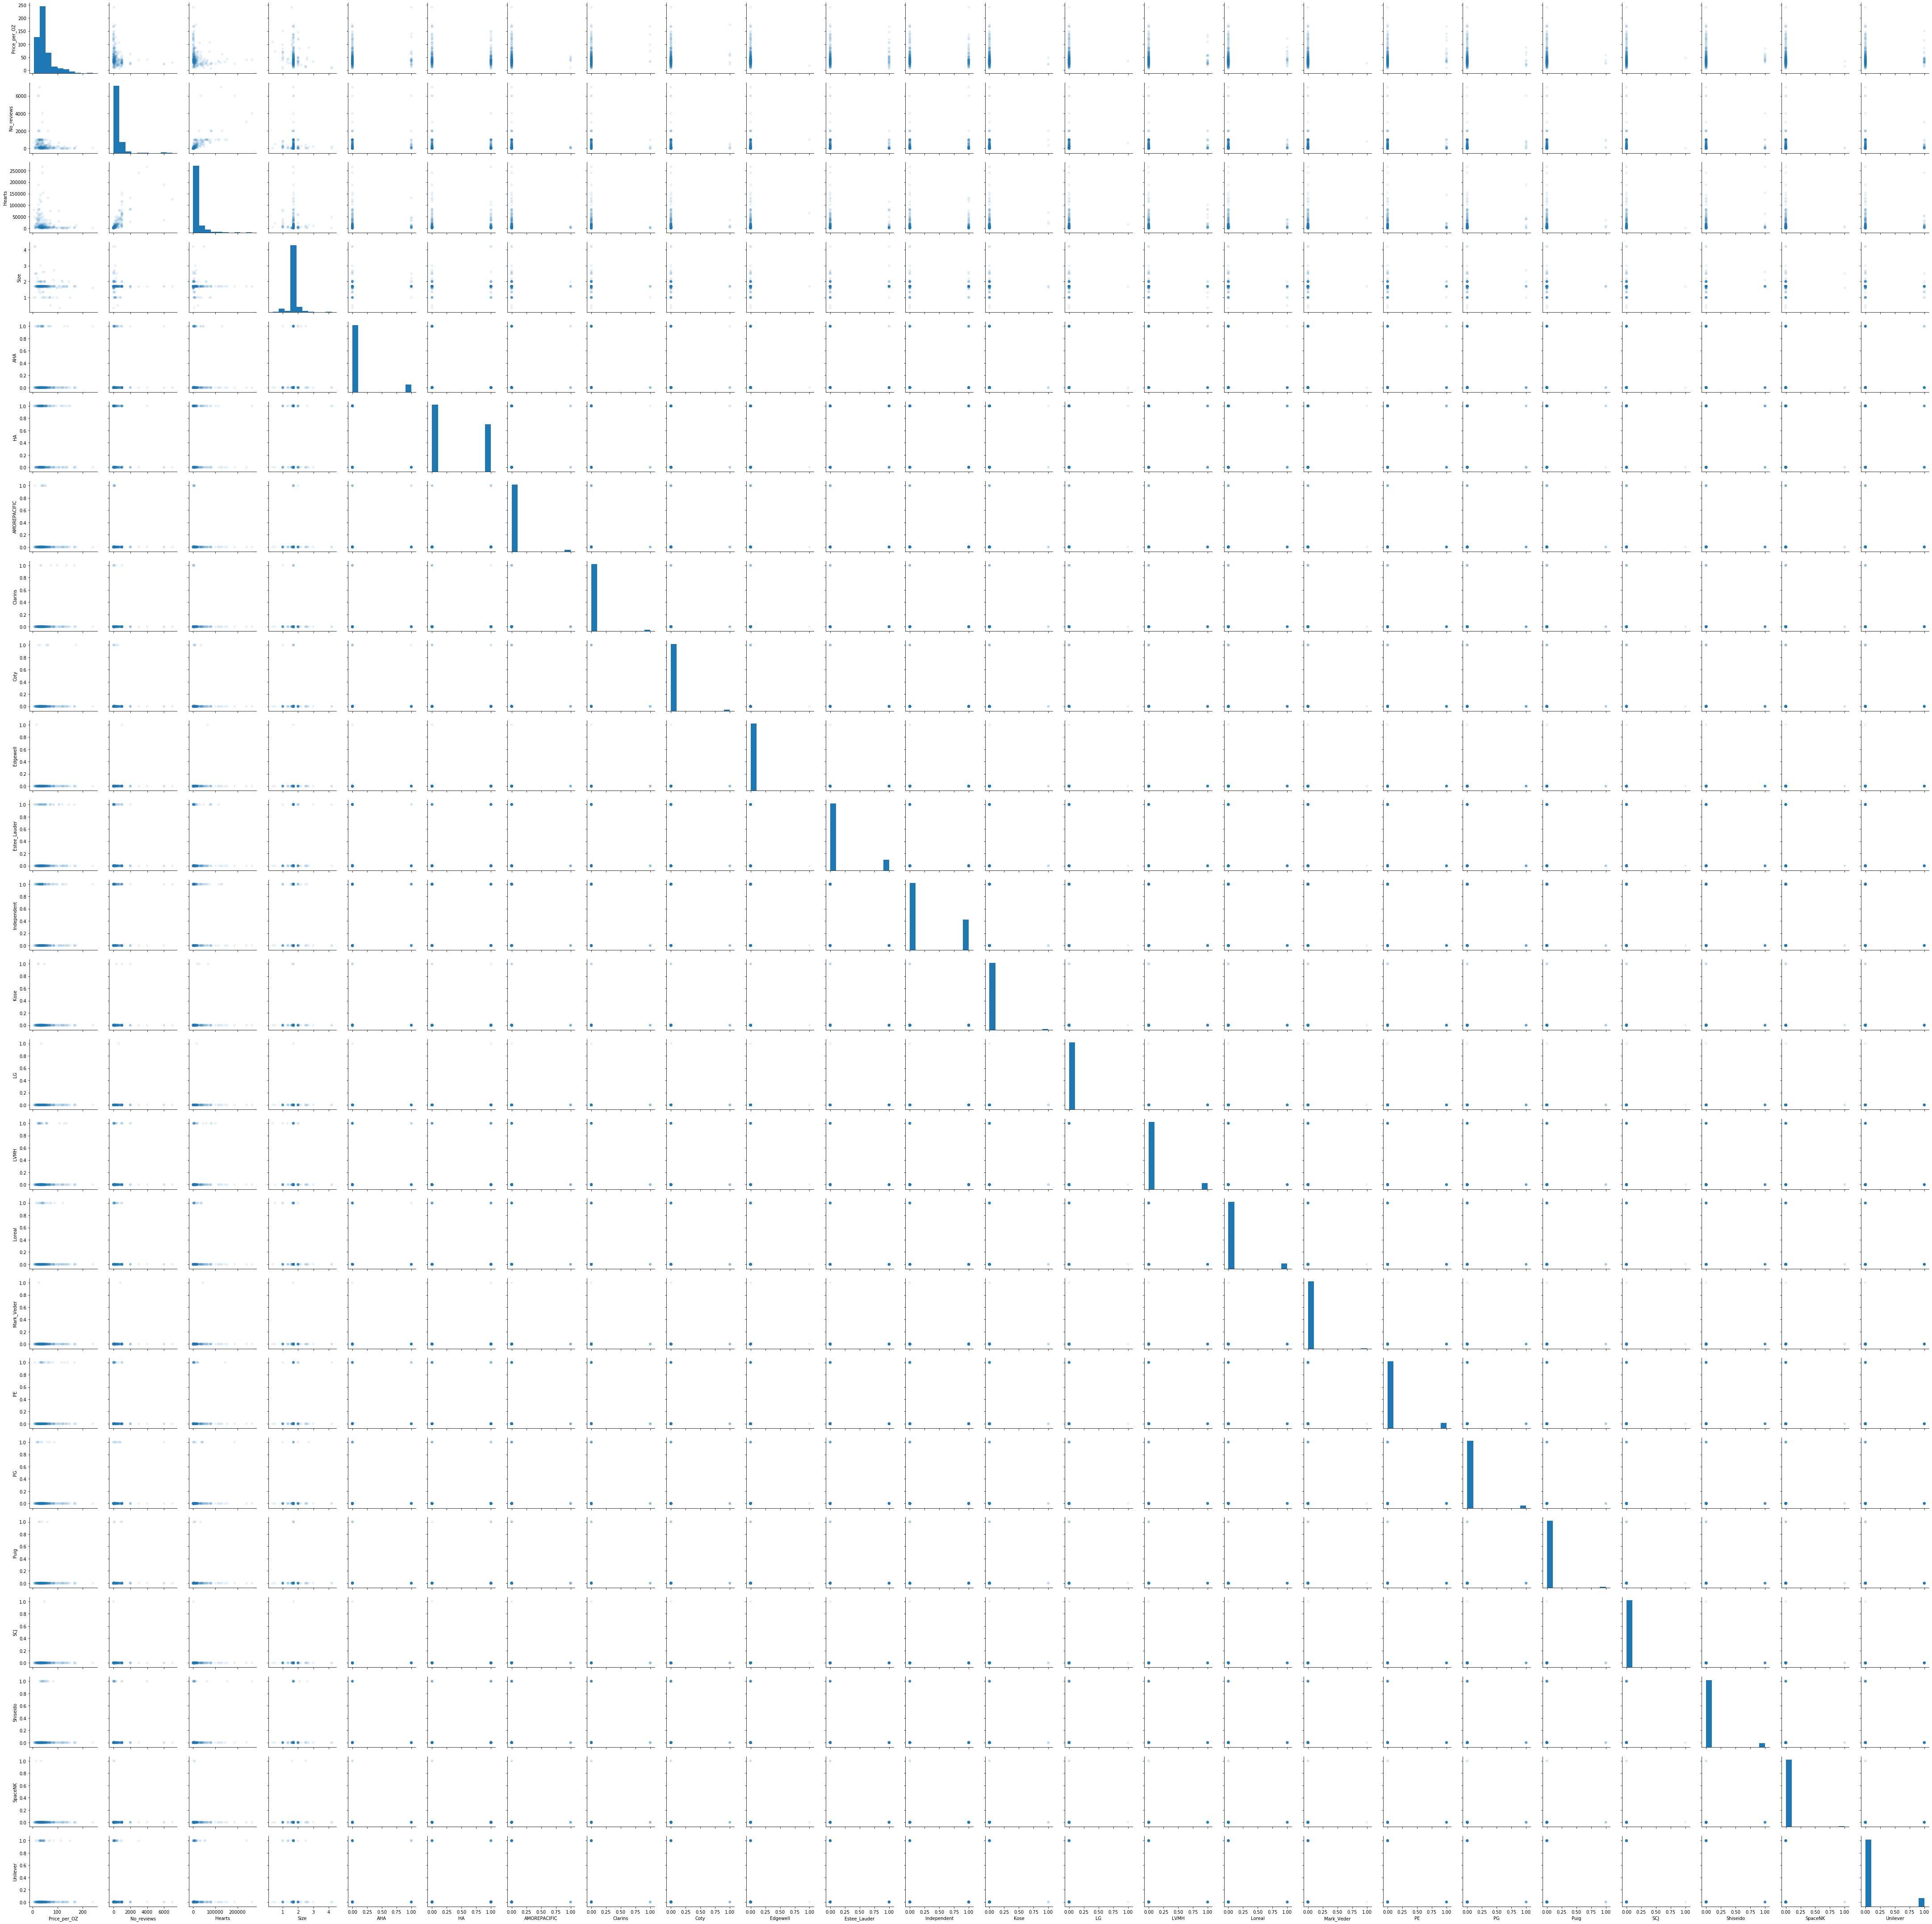

In [339]:
sns.pairplot(PCIG_df, plot_kws=dict(alpha=.1, edgecolor='none'));

In [379]:
X = product_df.loc[:,['No_reviews', 'Hearts', 'Size','AHA', 'HA','AMOREPACIFIC', 'Clarins',
                    'Coty','Edgewell', 'Estee_Lauder', 'Independent', 'Kose', 'LG', 'LVMH',
                    'Loreal', 'Mark_Veder', 'PE', 'PG', 'Puig', 'SCJ', 'Shiseido', 'SpaceNK', 'Unilever']]

y = product_df['Price_per_OZ']

In [380]:
X.info

<bound method DataFrame.info of      No_reviews  Hearts  Size  AHA  HA  AMOREPACIFIC  Clarins  Coty  Edgewell  \
0          4000  266164  1.69    0   1           0.0      0.0   0.0       0.0   
1          3000  240692  1.70    0   0           0.0      0.0   0.0       0.0   
2           667   75353  1.70    0   0           0.0      0.0   0.0       0.0   
3          1000  101831  1.70    0   1           0.0      0.0   0.0       0.0   
4          1000   62034  1.69    0   1           0.0      0.0   0.0       0.0   
..          ...     ...   ...  ...  ..           ...      ...   ...       ...   
286         174    4484  1.70    1   0           0.0      0.0   0.0       0.0   
287         174    4484  1.70    0   1           0.0      0.0   0.0       0.0   
288           6     771  1.50    0   0           0.0      0.0   0.0       0.0   
289          35    4281  1.70    0   1           0.0      0.0   0.0       0.0   
290          24    3043  1.69    0   1           0.0      0.0   0.0       0.0

In [381]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 
        

In [382]:
split_and_validate(X, y)


Validation R^2 score was: 0.013495274831248572
Feature coefficient results: 

No_reviews : -0.01
Hearts : -0.00
Size : -14.63
AHA : 5.49
HA : -3.49
AMOREPACIFIC : -9.69
Clarins : 50.24
Coty : 19.49
Edgewell : -24.05
Estee_Lauder : 5.87
Independent : -2.07
Kose : -8.41
LG : -6.59
LVMH : -6.24
Loreal : -3.98
Mark_Veder : -13.12
PE : 17.22
PG : 3.04
Puig : -0.46
SCJ : 0.00
Shiseido : 3.47
SpaceNK : -19.94
Unilever : -4.78


Looking at the pairplots, it doesn't appear that any features that have an upward-curved relationship and therefore, adding polynomial features would likely not improve R^2 score.

In [383]:
def add_deviation_feature(X, feature, category):
    
    # temp groupby object
    category_gb = X.groupby(category)[feature]
    
    # create columns of category means and standard deviations
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())
    
    # compute stds from category mean for each feature value,
    # add to X as new feature
    deviation_feature = (X[feature] - category_mean) / category_std 
    X[feature + '_Dev_' + category] = deviation_feature  

It appears that Number of Reviews and Hearts could be candidates for the deviation feature as they similarly measure interaction with product users

In [384]:
X2 = X.copy
add_deviation_feature(X2, 'No_reviews', 'Hearts')

split_and_validate(pd.get_dummies(X2), y)

AttributeError: 'function' object has no attribute 'groupby'

In [431]:
#DF without Brand and Name (Strings)
prod_df = product_df

In [ ]:
del prod_df['Brand']

In [413]:
del prod_df['Name']

In [433]:
del prod_df['PC']

In [434]:
del prod_df['Ingredients_y']

In [444]:
del prod_df['Price']

In [445]:
prod_df.head(2)

,No_reviews,Hearts,Size,AHA,HA,AMOREPACIFIC,Clarins,Coty,Edgewell,Estee_Lauder,...,Loreal,Mark_Veder,PE,PG,Puig,SCJ,Shiseido,SpaceNK,Unilever,Price_per_OZ
0,4000,266164,1.69,0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40.236685
1,3000,240692,1.70,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,39.999999


In [453]:
PCIG_df.columns

Index(['Price_per_OZ', 'No_reviews', 'Hearts', 'Size', 'AHA', 'HA',
       'AMOREPACIFIC', 'Clarins', 'Coty', 'Edgewell', 'Estee_Lauder',
       'Independent', 'Kose', 'LG', 'LVMH', 'Loreal', 'Mark_Veder', 'PE', 'PG',
       'Puig', 'SCJ', 'Shiseido', 'SpaceNK', 'Unilever'],
      dtype='object')

In [454]:
PCIG_df = PCIG_df.apply(pd.to_numeric)

In [455]:
PCIG_df.dtypes

Price_per_OZ    float64
No_reviews        int64
Hearts            int64
Size            float64
AHA               int64
HA                int64
AMOREPACIFIC    float64
Clarins         float64
Coty            float64
Edgewell        float64
Estee_Lauder    float64
Independent     float64
Kose            float64
LG              float64
LVMH            float64
Loreal          float64
Mark_Veder      float64
PE              float64
PG              float64
Puig            float64
SCJ             float64
Shiseido        float64
SpaceNK         float64
Unilever        float64
dtype: object

In [456]:
X, y = PCIG_df.drop('Price_per_OZ',axis=1), PCIG_df['Price_per_OZ']

# hold out 20% of the data for final testing
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

Standardize the model

In [464]:
print("No Dummies Price")
fit.summary()

No Dummies Price


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     4.449
Date:                Fri, 17 Jul 2020   Prob (F-statistic):            0.00449
Time:                        01:40:19   Log-Likelihood:                -1573.1
No. Observations:                 291   AIC:                             3154.
Df Residuals:                     287   BIC:                             3169.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.1545     16.969      4.075      0.000      35.755     102.555
No_reviews    -0.0096      0.006     -1.632      0.104      -0.021       0.002
Hearts        -0.0001      0.000     -0.966      0.335      -0.000       0.000
Size          10.3414      9.670      1.069      0.286      -8.693      29.375
==============================================================================
Omnibus:                      149.751   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              673.427
Skew:                           2.214   Prob(JB):                    5.85e-147
Kurtosis:                       8.995   Cond. No.                     2.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [473]:
print("No Dummies Price/OZ")
fit2.summary()

No Dummies Price/OZ


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_per_OZ   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     6.942
Date:                Fri, 17 Jul 2020   Prob (F-statistic):           0.000159
Time:                        01:42:58   Log-Likelihood:                -1416.9
No. Observations:                 291   AIC:                             2842.
Df Residuals:                     287   BIC:                             2856.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.1427      9.919      8.080      0.000      60.619      99.666
No_reviews    -0.0061      0.003     -1.756      0.080      -0.013       0.001
Hearts     -7.521e-05   8.02e-05     -0.938      0.349      -0.000    8.27e-05
Size         -16.5080      5.653     -2.920      0.004     -27.634      -5.382
==============================================================================
Omnibus:                      152.207   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              746.208
Skew:                           2.212   Prob(JB):                    9.18e-163
Kurtosis:                       9.479   Cond. No.                     2.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [466]:
print("Basic + Ingred")
fit4.summary()

Basic Ingred


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_per_OZ   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     4.924
Date:                Fri, 17 Jul 2020   Prob (F-statistic):           0.000244
Time:                        01:41:05   Log-Likelihood:                -1415.0
No. Observations:                 291   AIC:                             2842.
Df Residuals:                     285   BIC:                             2864.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     82.5861     10.013      8.248      0.000      62.877     102.295
No_reviews    -0.0068      0.003     -1.954      0.052      -0.014    4.83e-05
Hearts     -6.883e-05   8.04e-05     -0.856      0.393      -0.000    8.95e-05
Size         -16.2647      5.643     -2.882      0.004     -27.372      -5.157
AHA            1.7370      6.494      0.267      0.789     -11.044      14.518
HA            -6.8998      3.941     -1.751      0.081     -14.656       0.857
==============================================================================
Omnibus:                      146.799   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              672.341
Skew:                           2.149   Prob(JB):                    1.01e-146
Kurtosis:                       9.082   Cond. No.                     2.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [467]:
print("PC + Basic")
fit6.summary()

PC + Basic


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_per_OZ   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     4.924
Date:                Fri, 17 Jul 2020   Prob (F-statistic):           0.000244
Time:                        01:41:30   Log-Likelihood:                -1415.0
No. Observations:                 291   AIC:                             2842.
Df Residuals:                     285   BIC:                             2864.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     82.5861     10.013      8.248      0.000      62.877     102.295
No_reviews    -0.0068      0.003     -1.954      0.052      -0.014    4.83e-05
Hearts     -6.883e-05   8.04e-05     -0.856      0.393      -0.000    8.95e-05
Size         -16.2647      5.643     -2.882      0.004     -27.372      -5.157
AHA            1.7370      6.494      0.267      0.789     -11.044      14.518
HA            -6.8998      3.941     -1.751      0.081     -14.656       0.857
==============================================================================
Omnibus:                      146.799   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              672.341
Skew:                           2.149   Prob(JB):                    1.01e-146
Kurtosis:                       9.082   Cond. No.                     2.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [468]:
print("PC + Basic + Ingred")
fit8.summary()

PC + Basic + Ingred


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_per_OZ   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     2.323
Date:                Fri, 17 Jul 2020   Prob (F-statistic):            0.00138
Time:                        01:41:58   Log-Likelihood:                -1404.0
No. Observations:                 291   AIC:                             2850.
Df Residuals:                     270   BIC:                             2927.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       76.2066     16.329      4.667      0.000      44.058     108.355
No_reviews      -0.0062      0.004     -1.754      0.081      -0.013       0.001
Hearts       -6.402e-05   8.17e-05     -0.784      0.434      -0.000    9.67e-05
Size           -17.1241      5.752     -2.977      0.003     -28.448      -5.800
AHA              2.2472      6.551      0.343      0.732     -10.650      15.144
HA              -6.7187      4.052     -1.658      0.098     -14.697       1.260
AMOREPACIFIC    -3.8249     17.005     -0.225      0.822     -37.303      29.653
Clarins         44.0178     18.201      2.418      0.016       8.185      79.851
Coty            22.6194     18.164      1.245      0.214     -13.142      58.380
Edgewell       -19.6815     34.043     -0.578      0.564     -86.705      47.342
Estee_Lauder    13.5495     13.748      0.986      0.325     -13.517      40.616
Independent      4.0180     13.279      0.303      0.762     -22.125      30.161
Kose            -4.4979     22.218     -0.202      0.840     -48.241      39.245
LVMH             5.1207     14.347      0.357      0.721     -23.125      33.366
Loreal           3.8470     14.454      0.266      0.790     -24.610      32.304
Mark_Veder      -6.0817     33.882     -0.179      0.858     -72.787      60.624
PE              20.5791     14.545      1.415      0.158      -8.057      49.215
PG               4.2293     16.258      0.260      0.795     -27.780      36.238
Shiseido        10.2626     15.100      0.680      0.497     -19.467      39.992
SpaceNK        -15.5902     25.798     -0.604      0.546     -66.382      35.202
Unilever         2.4270     13.980      0.174      0.862     -25.096      29.950
==============================================================================
Omnibus:                      143.149   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              703.300
Skew:                           2.045   Prob(JB):                    1.91e-153
Kurtosis:                       9.424   Cond. No.                     1.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [469]:
print("LBIG")
fit9.summary()

LBIG


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_per_OZ   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     2.504
Date:                Fri, 17 Jul 2020   Prob (F-statistic):            0.00512
Time:                        01:42:17   Log-Likelihood:                -1413.4
No. Observations:                 291   AIC:                             2851.
Df Residuals:                     279   BIC:                             2895.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       84.6070     10.292      8.220      0.000      64.346     104.868
No_reviews      -0.0065      0.004     -1.844      0.066      -0.013       0.000
Hearts           -8e-05    8.2e-05     -0.975      0.330      -0.000    8.15e-05
Size           -17.5039      5.766     -3.035      0.003     -28.855      -6.153
AHA              2.5070      6.595      0.380      0.704     -10.475      15.489
HA              -7.3958      4.055     -1.824      0.069     -15.378       0.586
AMOREPACIFIC   -11.1950     11.585     -0.966      0.335     -34.000      11.610
Estee_Lauder     6.6050      5.743      1.150      0.251      -4.699      17.909
LVMH            -1.8750      6.995     -0.268      0.789     -15.644      11.894
Loreal          -3.3594      7.274     -0.462      0.645     -17.679      10.960
PG              -2.3019     10.487     -0.219      0.826     -22.946      18.342
Shiseido         3.6274      8.496      0.427      0.670     -13.098      20.353
==============================================================================
Omnibus:                      145.130   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              660.574
Skew:                           2.121   Prob(JB):                    3.62e-144
Kurtosis:                       9.040   Cond. No.                     2.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [470]:
print("Indie")
fit10.summary()

Indie


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_per_OZ   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     4.369
Date:                Fri, 17 Jul 2020   Prob (F-statistic):           0.000307
Time:                        01:42:34   Log-Likelihood:                -1414.2
No. Observations:                 291   AIC:                             2842.
Df Residuals:                     284   BIC:                             2868.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      84.5714     10.130      8.349      0.000      64.632     104.511
No_reviews     -0.0064      0.003     -1.823      0.069      -0.013       0.001
Hearts       -7.93e-05   8.08e-05     -0.981      0.327      -0.000    7.98e-05
Size          -16.3169      5.638     -2.894      0.004     -27.414      -5.219
AHA             1.8699      6.488      0.288      0.773     -10.901      14.641
HA             -7.6217      3.979     -1.915      0.056     -15.455       0.211
Independent    -5.0747      4.076     -1.245      0.214     -13.098       2.948
==============================================================================
Omnibus:                      148.676   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              702.461
Skew:                           2.166   Prob(JB):                    2.90e-153
Kurtosis:                       9.258   Cond. No.                     2.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [471]:
print("PE")
fit11.summary()

PE


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_per_OZ   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     5.244
Date:                Fri, 17 Jul 2020   Prob (F-statistic):           0.000127
Time:                        01:42:45   Log-Likelihood:                -1414.3
No. Observations:                 291   AIC:                             2841.
Df Residuals:                     285   BIC:                             2863.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      84.7709     10.090      8.401      0.000      64.910     104.631
No_reviews     -0.0063      0.003     -1.807      0.072      -0.013       0.001
Hearts      -8.163e-05   8.03e-05     -1.017      0.310      -0.000    7.64e-05
Size          -16.2509      5.624     -2.889      0.004     -27.321      -5.180
HA             -7.9311      3.826     -2.073      0.039     -15.461      -0.401
Independent    -5.0554      4.069     -1.242      0.215     -13.064       2.953
==============================================================================
Omnibus:                      150.018   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              723.640
Skew:                           2.180   Prob(JB):                    7.31e-158
Kurtosis:                       9.377   Cond. No.                     2.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""